# Project

In [1]:
# loading libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import time, timedelta
import re
%matplotlib inline

In [2]:
# loading files
file_paths = {
    'calls': 'Project/Calls.xlsx',
    'contacts': 'Project/Contacts.xlsx',
    'deals': 'Project/Deals.xlsx',
    'spend': 'Project/Spend.xlsx'
}

for var_name, path in file_paths.items():
    globals()[var_name] = pd.read_excel(path)

In [3]:
# Deriving descriptive statistics
for name in file_paths.keys():
    df = globals()[name]
    print(f'===== Анализ датафрейма: {name.upper()} =====')
    df.info()
    print('-'*20)
    print('Percentage of missing values')
    print((df.isnull().sum() / len(df)) * 100)
    print('-'*20)
    print(f'Count of total duplicates in {name.title()}:', df.duplicated().sum())
    print('-'*20)
    display(df.head())
    print('-'*20)
    display(df.describe(include='all').T)
    print('\n' + '='*60 + '\n')

===== Анализ датафрейма: CALLS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Id                          95874 non-null  int64  
 1   Call Start Time             95874 non-null  object 
 2   Call Owner Name             95874 non-null  object 
 3   CONTACTID                   91941 non-null  float64
 4   Call Type                   95874 non-null  object 
 5   Call Duration (in seconds)  95791 non-null  float64
 6   Call Status                 95874 non-null  object 
 7   Dialled Number              0 non-null      float64
 8   Outgoing Call Status        86875 non-null  object 
 9   Scheduled in CRM            86875 non-null  float64
 10  Tag                         0 non-null      float64
dtypes: float64(5), int64(1), object(5)
memory usage: 8.0+ MB
--------------------
Percentage of missing values
I

,Id,Call Start Time,Call Owner Name,CONTACTID,Call Type,Call Duration (in seconds),Call Status,Dialled Number,Outgoing Call Status,Scheduled in CRM,Tag
0,5805028000000805001,30.06.2023 08:43,John Doe,NaN,Inbound,171.0,Received,NaN,NaN,NaN,NaN
1,5805028000000768006,30.06.2023 08:46,John Doe,NaN,Outbound,28.0,Attended Dialled,NaN,Completed,0.0,NaN
2,5805028000000764027,30.06.2023 08:59,John Doe,NaN,Outbound,24.0,Attended Dialled,NaN,Completed,0.0,NaN
3,5805028000000787003,30.06.2023 09:20,John Doe,5.805028e+18,Outbound,6.0,Attended Dialled,NaN,Completed,0.0,NaN
4,5805028000000768019,30.06.2023 09:30,John Doe,5.805028e+18,Outbound,11.0,Attended Dialled,NaN,Completed,0.0,NaN


--------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,95874.0,NaN,NaN,NaN,5805028000031678464.0,15920579.73083,5805028000000763904.0,5805028000018564096.0,5805028000032743424.0,5805028000045609984.0,5805028000056911872.0
Call Start Time,95874,68445,06.06.2024 15:07,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Call Owner Name,95874,33,Yara Edwards,9059,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CONTACTID,91941.0,NaN,NaN,NaN,5805028000026533888.0,16055872.799517,5805028000000645120.0,5805028000012447744.0,5805028000025716736.0,5805028000040092672.0,5805028000056892416.0
Call Type,95874,3,Outbound,86875,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Call Duration (in seconds),95791.0,NaN,NaN,NaN,164.977263,401.410826,0.0,4.0,8.0,98.0,7625.0
Call Status,95874,11,Attended Dialled,70703,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dialled Number,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Outgoing Call Status,86875,4,Completed,86792,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scheduled in CRM,86875.0,NaN,NaN,NaN,0.001635,0.040397,0.0,0.0,0.0,0.0,1.0




===== Анализ датафрейма: CONTACTS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  18548 non-null  int64 
 1   Contact Owner Name  18548 non-null  object
 2   Created Time        18548 non-null  object
 3   Modified Time       18548 non-null  object
dtypes: int64(1), object(3)
memory usage: 579.8+ KB
--------------------
Percentage of missing values
Id                    0.0
Contact Owner Name    0.0
Created Time          0.0
Modified Time         0.0
dtype: float64
--------------------
Count of total duplicates in Contacts: 0
--------------------


,Id,Contact Owner Name,Created Time,Modified Time
0,5805028000000645014,Rachel White,27.06.2023 11:28,22.12.2023 13:34
1,5805028000000872003,Charlie Davis,03.07.2023 11:31,21.05.2024 10:23
2,5805028000000889001,Bob Brown,02.07.2023 22:37,21.12.2023 13:17
3,5805028000000907006,Bob Brown,03.07.2023 05:44,29.12.2023 15:20
4,5805028000000939010,Nina Scott,04.07.2023 10:11,16.04.2024 16:14


--------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,18548.0,NaN,NaN,NaN,5805028000029632512.0,15663617.029277,5805028000000645120.0,5805028000016978944.0,5805028000029575168.0,5805028000043589632.0,5805028000056906752.0
Contact Owner Name,18548,28,Charlie Davis,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Created Time,18548,17921,10.06.2024 09:00,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Modified Time,18548,16580,13.06.2024 17:08,25,NaN,NaN,NaN,NaN,NaN,NaN,NaN




===== Анализ датафрейма: DEALS =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21595 entries, 0 to 21594
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   21593 non-null  float64
 1   Deal Owner Name      21564 non-null  object 
 2   Closing Date         14645 non-null  object 
 3   Quality              19340 non-null  object 
 4   Stage                21593 non-null  object 
 5   Lost Reason          16124 non-null  object 
 6   Page                 21593 non-null  object 
 7   Campaign             16067 non-null  object 
 8   SLA                  15533 non-null  object 
 9   Content              14147 non-null  object 
 10  Term                 12454 non-null  object 
 11  Source               21593 non-null  object 
 12  Payment Type         496 non-null    object 
 13  Product              3592 non-null   object 
 14  Education Type       3300 non-null   object 
 1

,Id,Deal Owner Name,Closing Date,Quality,Stage,Lost Reason,Page,Campaign,SLA,Content,...,Product,Education Type,Created Time,Course duration,Months of study,Initial Amount Paid,Offer Total Amount,Contact Name,City,Level of Deutsch
0,5.805028e+18,Ben Hall,NaN,NaN,New Lead,NaN,/eng/test,03.07.23women,NaN,v16,...,NaN,NaN,21.06.2024 15:30,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
1,5.805028e+18,Ulysses Adams,NaN,NaN,New Lead,NaN,/at-eng,NaN,NaN,NaN,...,Web Developer,Morning,21.06.2024 15:23,6.0,NaN,0,2000,5.805028e+18,NaN,NaN
2,5.805028e+18,Ulysses Adams,21.06.2024,D - Non Target,Lost,Non target,/at-eng,engwien_AT,00:26:43,b1-at,...,NaN,NaN,21.06.2024 14:45,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
3,5.805028e+18,Eva Kent,21.06.2024,E - Non Qualified,Lost,Invalid number,/eng,04.07.23recentlymoved_DE,01:00:04,bloggersvideo14com,...,NaN,NaN,21.06.2024 13:32,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN
4,5.805028e+18,Ben Hall,21.06.2024,D - Non Target,Lost,Non target,/eng,discovery_DE,00:53:12,website,...,NaN,NaN,21.06.2024 13:21,NaN,NaN,NaN,NaN,5.805028e+18,NaN,NaN


--------------------


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Id,21593.0,NaN,NaN,NaN,5805028000030050304.0,15697135.239634,5805028000000921600.0,5805028000017641472.0,5805028000030103552.0,5805028000043748352.0,5805028000056892416.0
Deal Owner Name,21564,27,Charlie Davis,2963,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Closing Date,14645,359,02.04.2024,119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quality,19340,6,E - Non Qualified,7634,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,21593,13,Lost,15743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Lost Reason,16124,21,Doesn't Answer,4135,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Page,21593,34,/eng,5814,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign,16067,154,performancemax_digitalmarkt_ru_DE,2653,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SLA,15533,13357,00:10:11,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content,14147,187,_{region_name}_,3258,NaN,NaN,NaN,NaN,NaN,NaN,NaN




===== Анализ датафрейма: SPEND =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         20779 non-null  datetime64[ns]
 1   Source       20779 non-null  object        
 2   Campaign     14785 non-null  object        
 3   Impressions  20779 non-null  int64         
 4   Spend        20779 non-null  float64       
 5   Clicks       20779 non-null  int64         
 6   AdGroup      13951 non-null  object        
 7   Ad           13951 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.3+ MB
--------------------
Percentage of missing values
Date            0.000000
Source          0.000000
Campaign       28.846431
Impressions     0.000000
Spend           0.000000
Clicks          0.000000
AdGroup        32.860099
Ad             32.860099
dtype: float64
-----------------

,Date,Source,Campaign,Impressions,Spend,Clicks,AdGroup,Ad
0,2023-07-03,Google Ads,gen_analyst_DE,6,0.00,0,NaN,NaN
1,2023-07-03,Google Ads,performancemax_eng_DE,4,0.01,1,NaN,NaN
2,2023-07-03,Facebook Ads,NaN,0,0.00,0,NaN,NaN
3,2023-07-03,Google Ads,NaN,0,0.00,0,NaN,NaN
4,2023-07-03,CRM,NaN,0,0.00,0,NaN,NaN


--------------------


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,20779,NaN,NaN,NaN,2024-01-14 22:32:40.864334080,2023-07-03 00:00:00,2023-10-13 00:00:00,2024-01-27 00:00:00,2024-04-16 00:00:00,2024-06-21 00:00:00,NaN
Source,20779,14,Facebook Ads,9732,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Campaign,14785,51,12.07.2023wide_DE,2073,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Impressions,20779.0,NaN,NaN,NaN,2458.203475,0.0,0.0,63.0,709.0,431445.0,11442.528075
Spend,20779.0,NaN,NaN,NaN,7.195892,0.0,0.0,0.58,5.75,774.0,26.76008
Clicks,20779.0,NaN,NaN,NaN,23.990616,0.0,0.0,1.0,12.0,2415.0,85.245714
AdGroup,13951,24,wide,5451,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ad,13951,176,bloggersvideo9com,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Удаление пустых столбцов и полных дубликатов

In [4]:
calls = calls.drop(columns=['Dialled Number', 'Tag'])

In [5]:
# Removing duplicates in Deals
deals.drop_duplicates(inplace=True)

In [6]:
# Removing duplicates in Spend
spend.drop_duplicates(inplace=True)

### Оптимизация заголовков и отделение ид от числовых данных

In [7]:
# Optimizing Column Names
for name in file_paths.keys():
    df = globals()[name]
    df.columns = df.columns.str.strip() \
                           .str.lower() \
                           .str.replace(' ', '_') \
                           .str.replace(r'[^\w_]', '', regex=True)
    print(f"{name}: columns assigned snake_case")

calls: columns assigned snake_case
contacts: columns assigned snake_case
deals: columns assigned snake_case
spend: columns assigned snake_case


In [8]:
# сократим идентификаторы
calls['id'] = calls['id'] - 5805028000000000000
calls['contactid'] = calls['contactid'] - 5805028000000000000
contacts['id'] = contacts['id'] - 5805028000000000000
deals['id'] = deals['id'] - 5805028000000000000
deals['contact_name'] = deals['contact_name'] - 5805028000000000000

In [9]:
deals['id'].unique()

array([56864768., 56859648., 56832000., ...,   926720.,   921600.,
             nan])

In [10]:
# Let's transform the specified columns into categorical ones to exclude them from the analysis
category_id_columns = {
    'calls': ['id', 'contactid'],
    'contacts': ['id'],
    'deals': ['id', 'contact_name']
}

for name, columns in category_id_columns.items():
    df = globals()[name]
    for col in columns:
        if col in df.columns:
            df[col] = pd.Categorical(df[col], ordered=False)
            print(f"{name}: column '{col}' converted to category")
        else:
            print(f"{name}: column '{col}' not found")

calls: column 'id' converted to category
calls: column 'contactid' converted to category
contacts: column 'id' converted to category
deals: column 'id' converted to category
deals: column 'contact_name' converted to category


In [11]:
# Distribution of data in each column
for name in file_paths.keys():
    df = globals()[name]
    print(f'--- {name.upper()} ---')
    
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=np.number).columns.tolist()

    print("Categorical Variables:")
    print(cat_cols if cat_cols else "Нет категориальных переменных")
    
    print("Numerical Variables:")
    print(num_cols if num_cols else "Нет числовых переменных")
    
    print('-' * 40)

--- CALLS ---
Categorical Variables:
['id', 'call_start_time', 'call_owner_name', 'contactid', 'call_type', 'call_status', 'outgoing_call_status']
Numerical Variables:
['call_duration_in_seconds', 'scheduled_in_crm']
----------------------------------------
--- CONTACTS ---
Categorical Variables:
['id', 'contact_owner_name', 'created_time', 'modified_time']
Numerical Variables:
Нет числовых переменных
----------------------------------------
--- DEALS ---
Categorical Variables:
['id', 'deal_owner_name', 'closing_date', 'quality', 'stage', 'lost_reason', 'page', 'campaign', 'sla', 'content', 'term', 'source', 'payment_type', 'product', 'education_type', 'created_time', 'initial_amount_paid', 'offer_total_amount', 'contact_name', 'city', 'level_of_deutsch']
Numerical Variables:
['course_duration', 'months_of_study']
----------------------------------------
--- SPEND ---
Categorical Variables:
['source', 'campaign', 'adgroup', 'ad']
Numerical Variables:
['impressions', 'spend', 'clicks']


### Визуализации для предварительного анализа

--- CALLS ---
call_duration_in_seconds


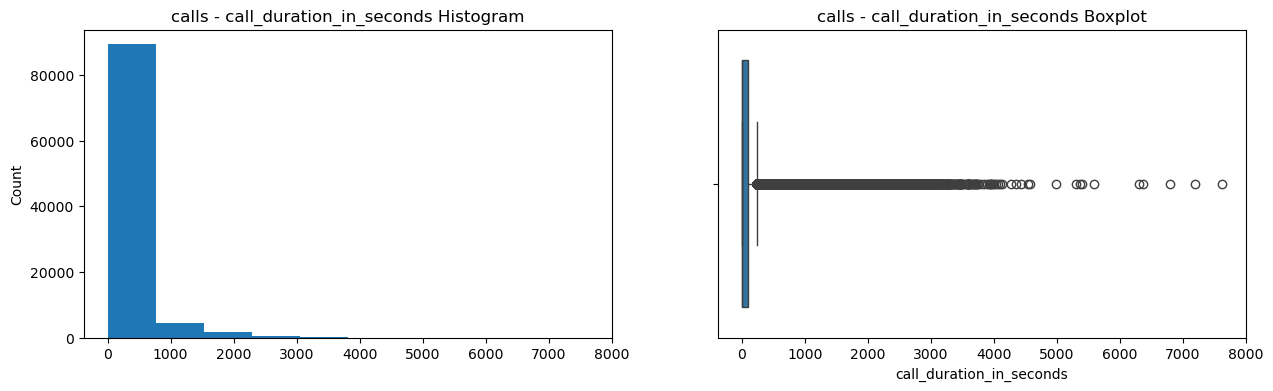

scheduled_in_crm


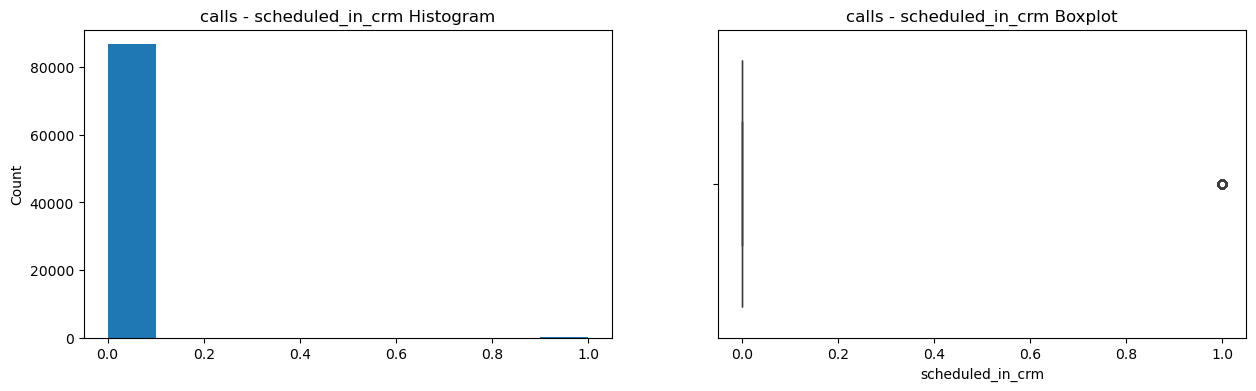

--- CONTACTS ---
--- DEALS ---
course_duration


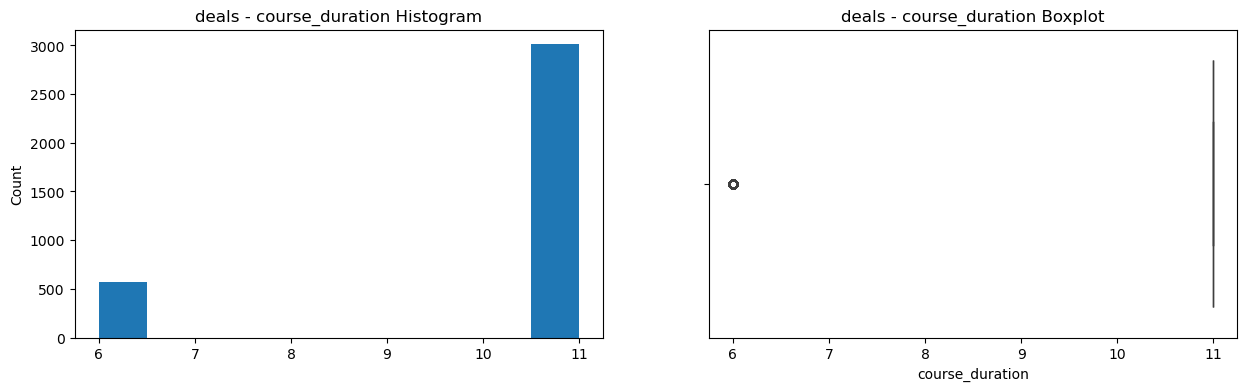

months_of_study


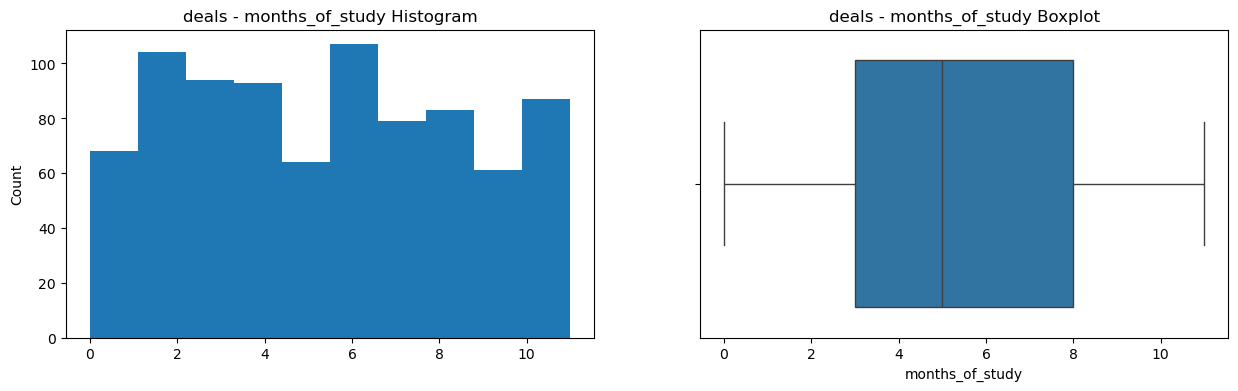

--- SPEND ---
impressions


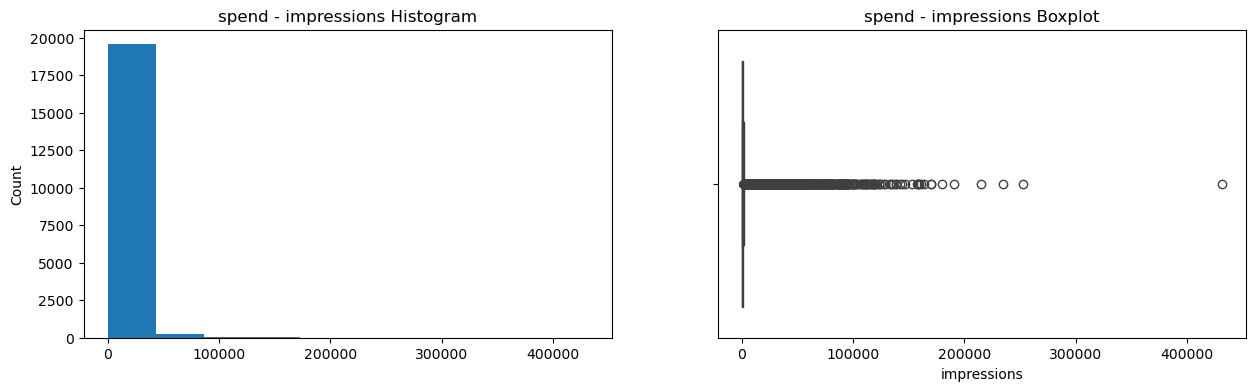

spend


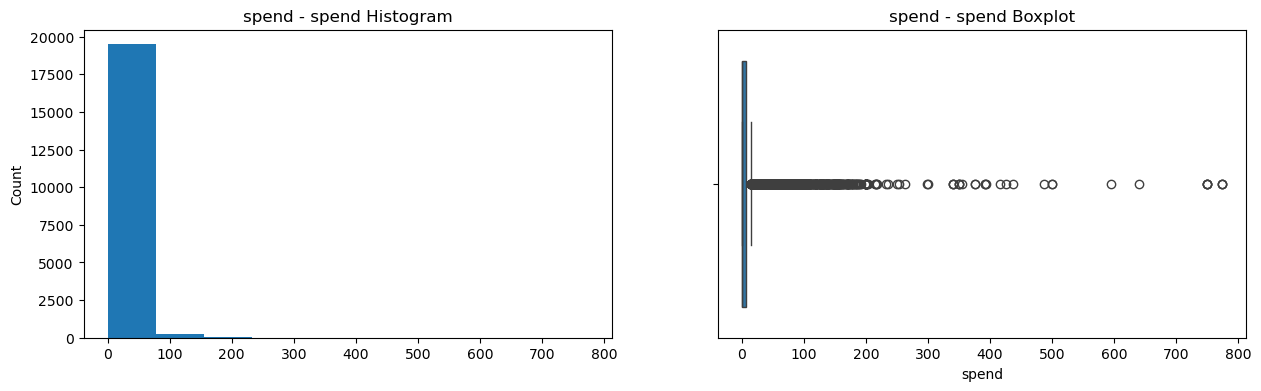

clicks


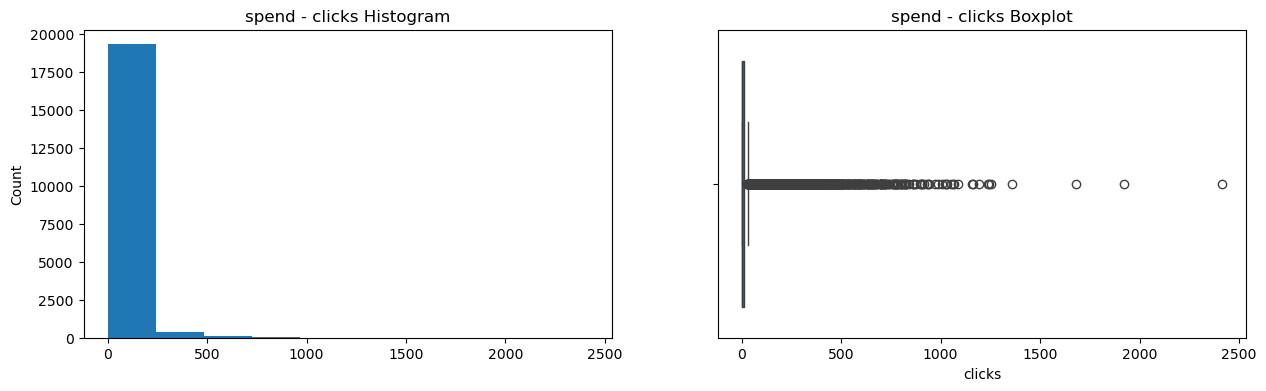

In [12]:
# Visualization of Numeric Variables
for name in file_paths.keys():
    df = globals()[name]
    print(f'--- {name.upper()} ---')
    num_cols = df.select_dtypes(include=np.number).columns.tolist()
    
    for col in num_cols:
        print(col)
        plt.figure(figsize=(15, 4))

        plt.subplot(1, 2, 1)
        df[col].hist(grid=False)
        plt.title(f'{name} - {col} Histogram')
        plt.ylabel('Count')

        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[col])
        plt.title(f'{name} - {col} Boxplot')

        plt.show()

--- CALLS ---
Skipping 'id' — too many categories (95874)
Skipping 'call_start_time' — too many categories (68445)
Skipping 'call_owner_name' — too many categories (33)
Skipping 'contactid' — too many categories (7447)


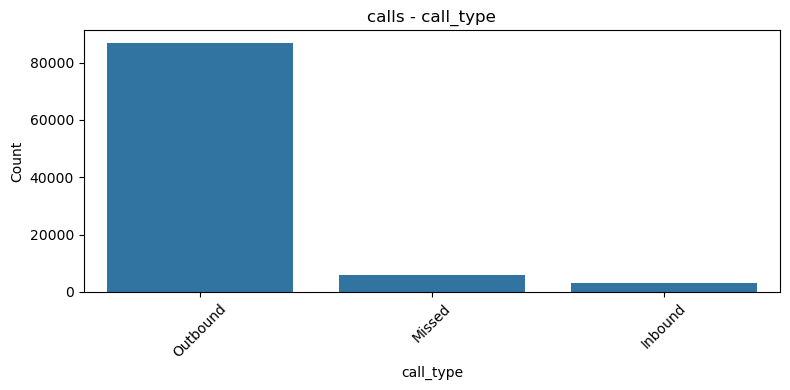

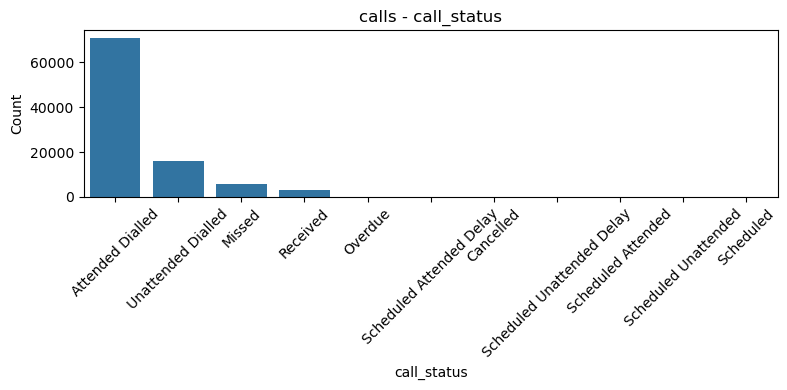

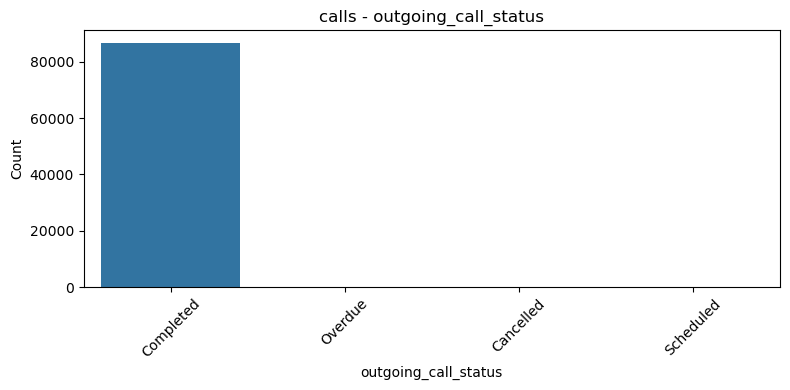

--- CONTACTS ---
Skipping 'id' — too many categories (18548)
Skipping 'contact_owner_name' — too many categories (28)
Skipping 'created_time' — too many categories (17921)
Skipping 'modified_time' — too many categories (16580)
--- DEALS ---
Skipping 'id' — too many categories (8612)
Skipping 'deal_owner_name' — too many categories (27)
Skipping 'closing_date' — too many categories (359)


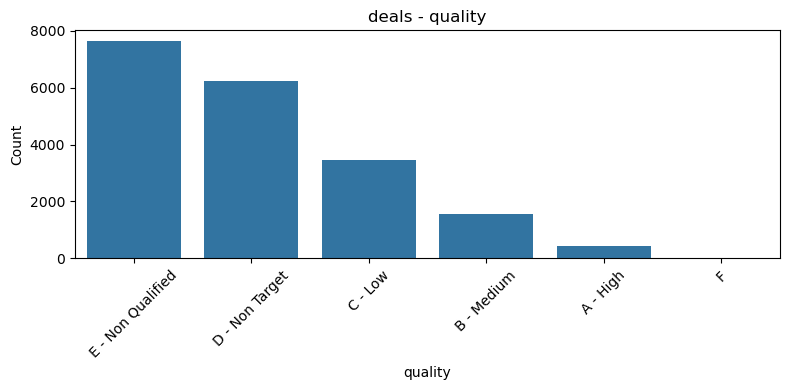

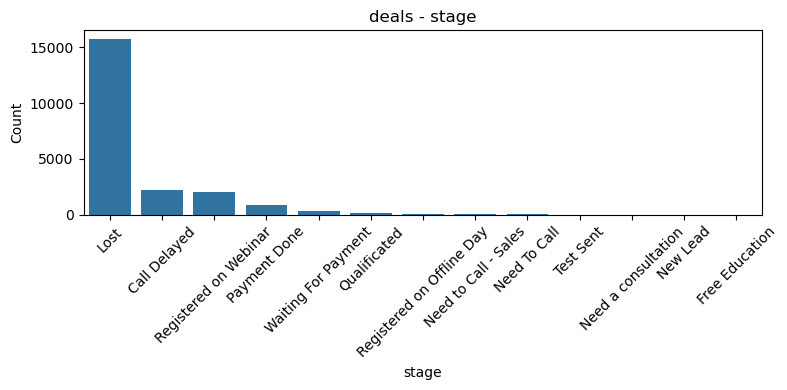

Skipping 'lost_reason' — too many categories (21)
Skipping 'page' — too many categories (34)
Skipping 'campaign' — too many categories (154)
Skipping 'sla' — too many categories (13357)
Skipping 'content' — too many categories (187)
Skipping 'term' — too many categories (220)


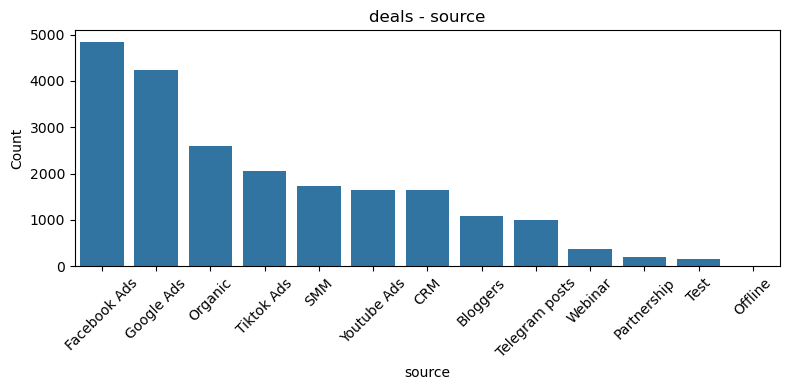

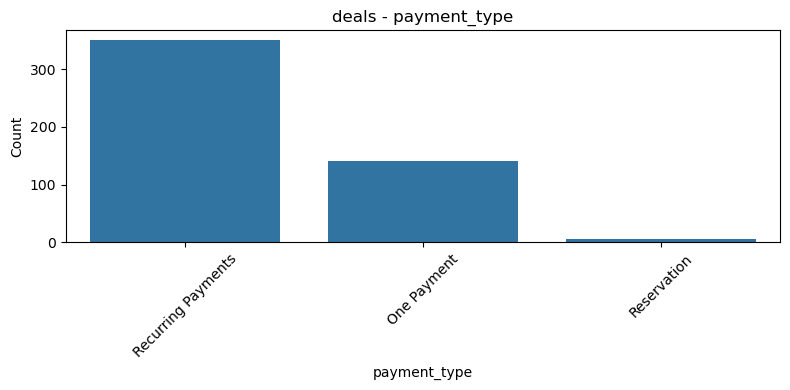

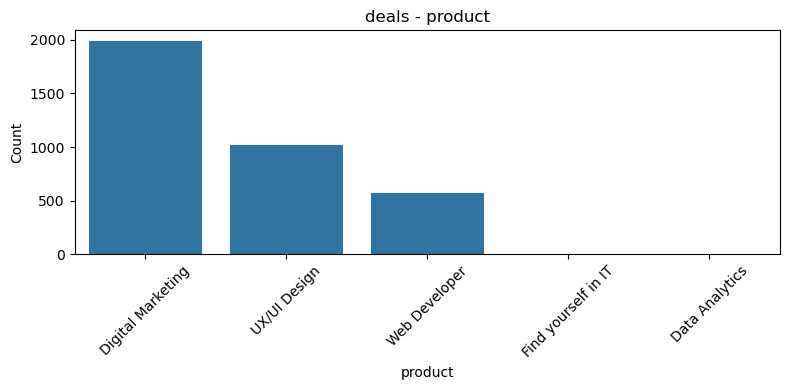

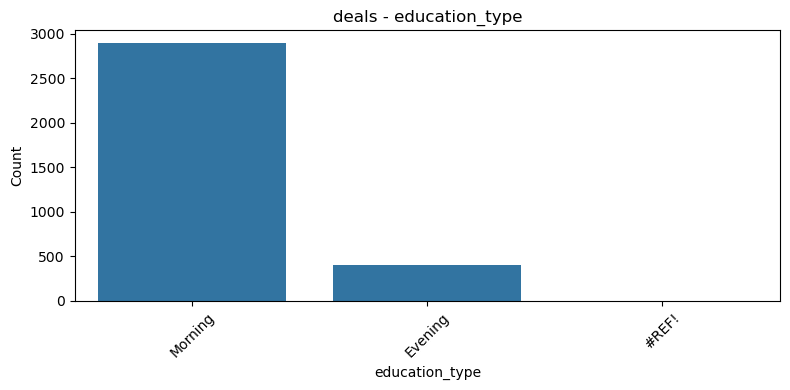

Skipping 'created_time' — too many categories (20334)
Skipping 'initial_amount_paid' — too many categories (24)
Skipping 'offer_total_amount' — too many categories (21)
Skipping 'contact_name' — too many categories (8145)
Skipping 'city' — too many categories (876)
Skipping 'level_of_deutsch' — too many categories (215)
--- SPEND ---


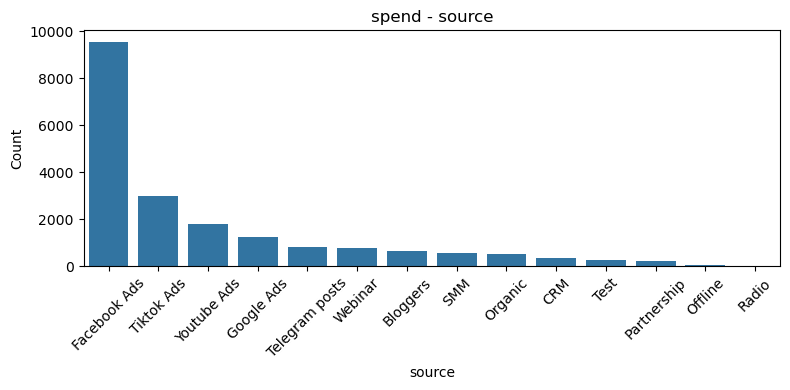

Skipping 'campaign' — too many categories (51)
Skipping 'adgroup' — too many categories (24)
Skipping 'ad' — too many categories (176)


In [13]:
# Visualization of categorical variables
for name in file_paths.keys():
    df = globals()[name]
    print(f'--- {name.upper()} ---')
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

    if not cat_cols:
        print("No categorical variables.")
        continue

    for col in cat_cols:
        nunique = df[col].nunique()
        if nunique > 20:
            print(f"Skipping '{col}' — too many categories ({nunique})")
            continue

        plt.figure(figsize=(8, 4))
        vc = df[col].value_counts().head(20)
        sns.barplot(x=vc.index, y=vc.values)
        plt.title(f'{name} - {col}')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

#### Логарифмирование выборочных столбцов

--- CALLS ---
Visualization: call_duration_in_seconds_log


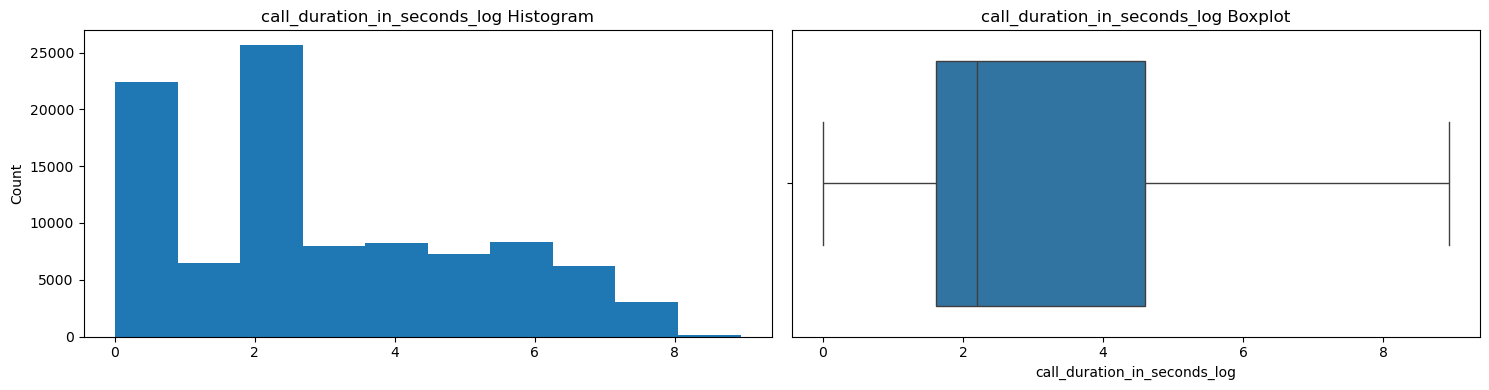

Visualization: scheduled_in_crm_log


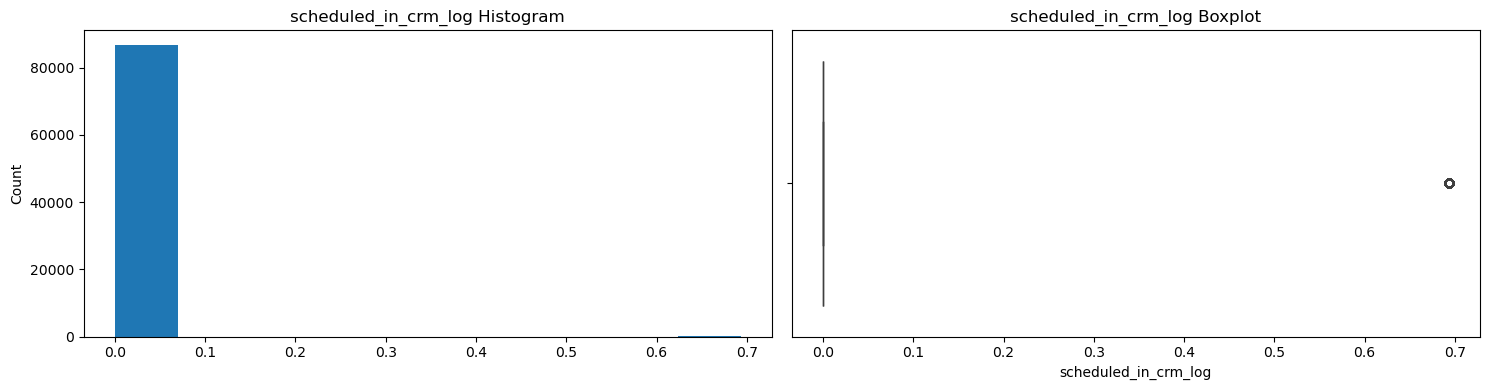

--- SPEND ---
Visualization: impressions_log


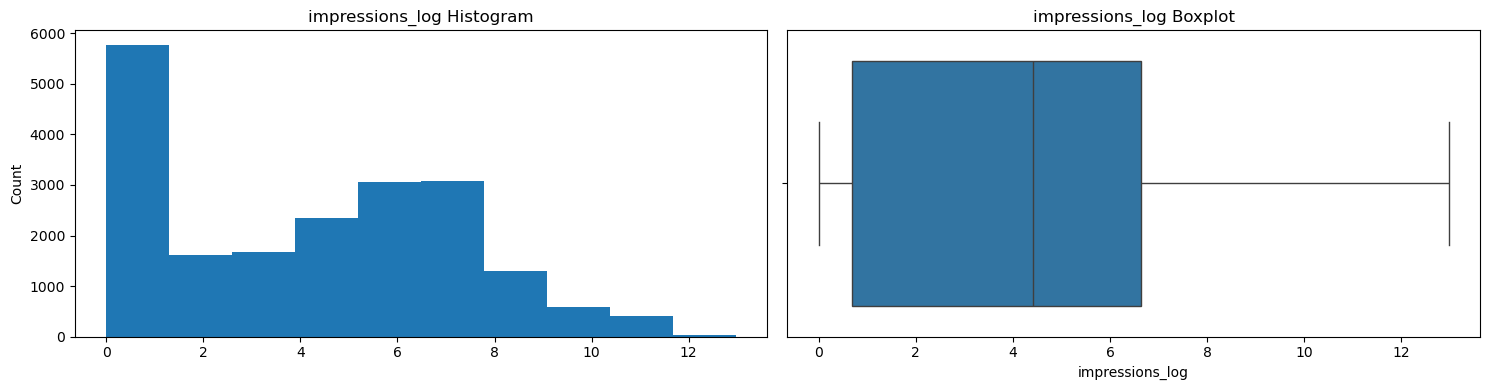

Visualization: spend_log


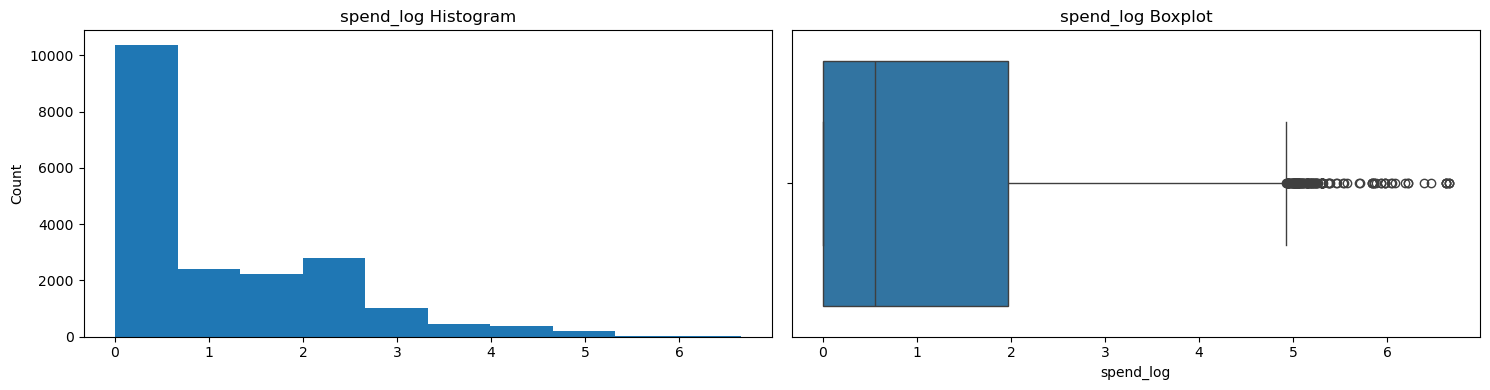

Visualization: clicks_log


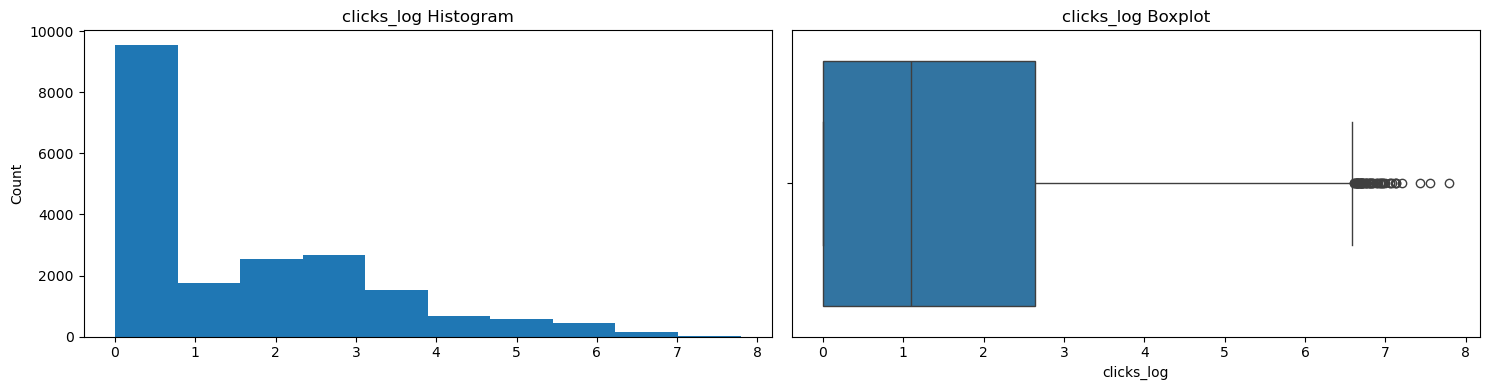

In [14]:
# Logarithmic transformation
log_transform_columns = {
    'calls': ['call_duration_in_seconds', 'scheduled_in_crm'],
    'spend': ['impressions', 'spend', 'clicks']
}

for name, columns in log_transform_columns.items():
    df = globals()[name]
    print(f'--- {name.upper()} ---')
    
    for col in columns:
        if col not in df.columns:
            print(f"Column '{col}' is missing in {name}")
            continue
        
        log_col = col + '_log'
        df[log_col] = np.log1p(df[col])

        print(f'Visualization: {log_col}')
        plt.figure(figsize=(15, 4))
        
        plt.subplot(1, 2, 1)
        df[log_col].hist(grid=False)
        plt.title(f'{log_col} Histogram')
        plt.ylabel('Count')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=df[log_col])
        plt.title(f'{log_col} Boxplot')
        
        plt.tight_layout()
        plt.show()

--- CALLS ---


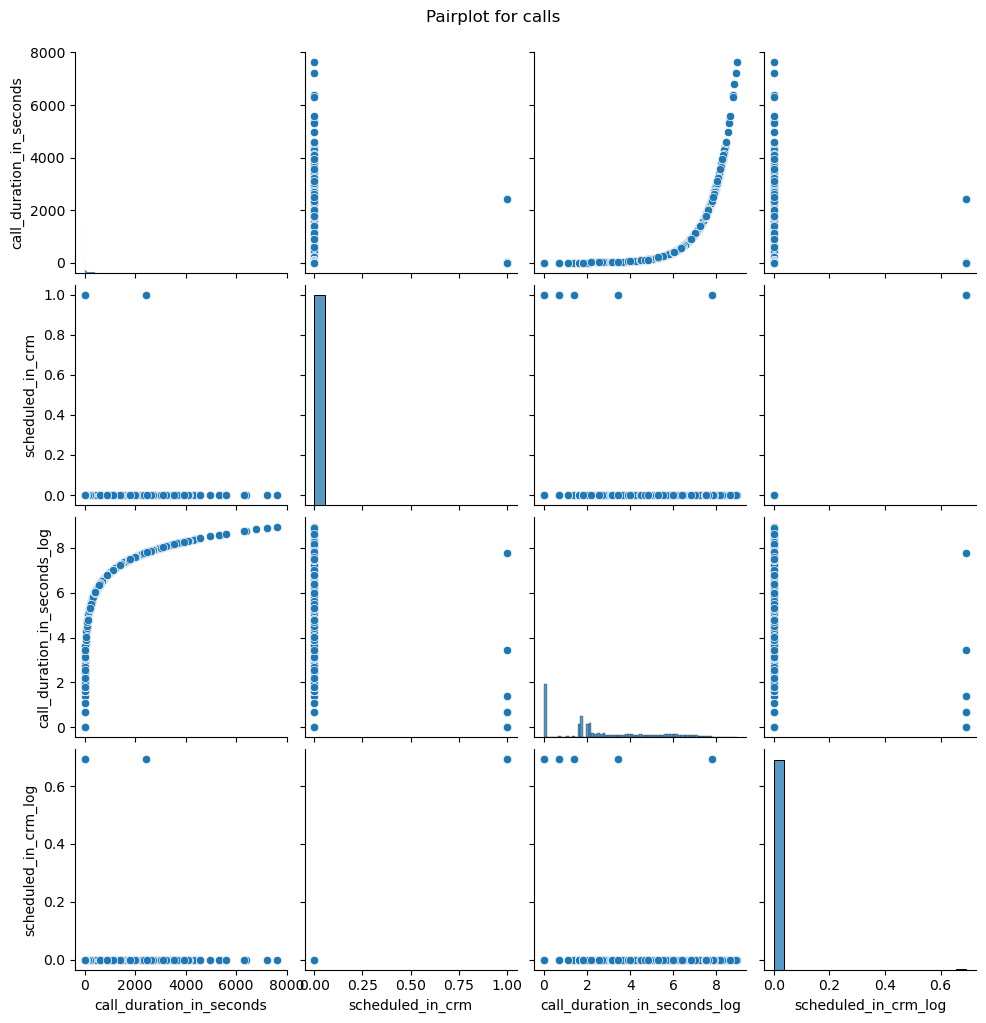

--- CONTACTS ---
Skipping contacts — not enough numeric columns for pairplot.
--- DEALS ---


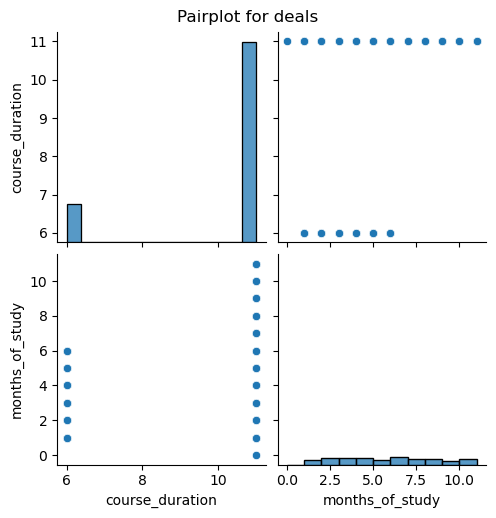

--- SPEND ---


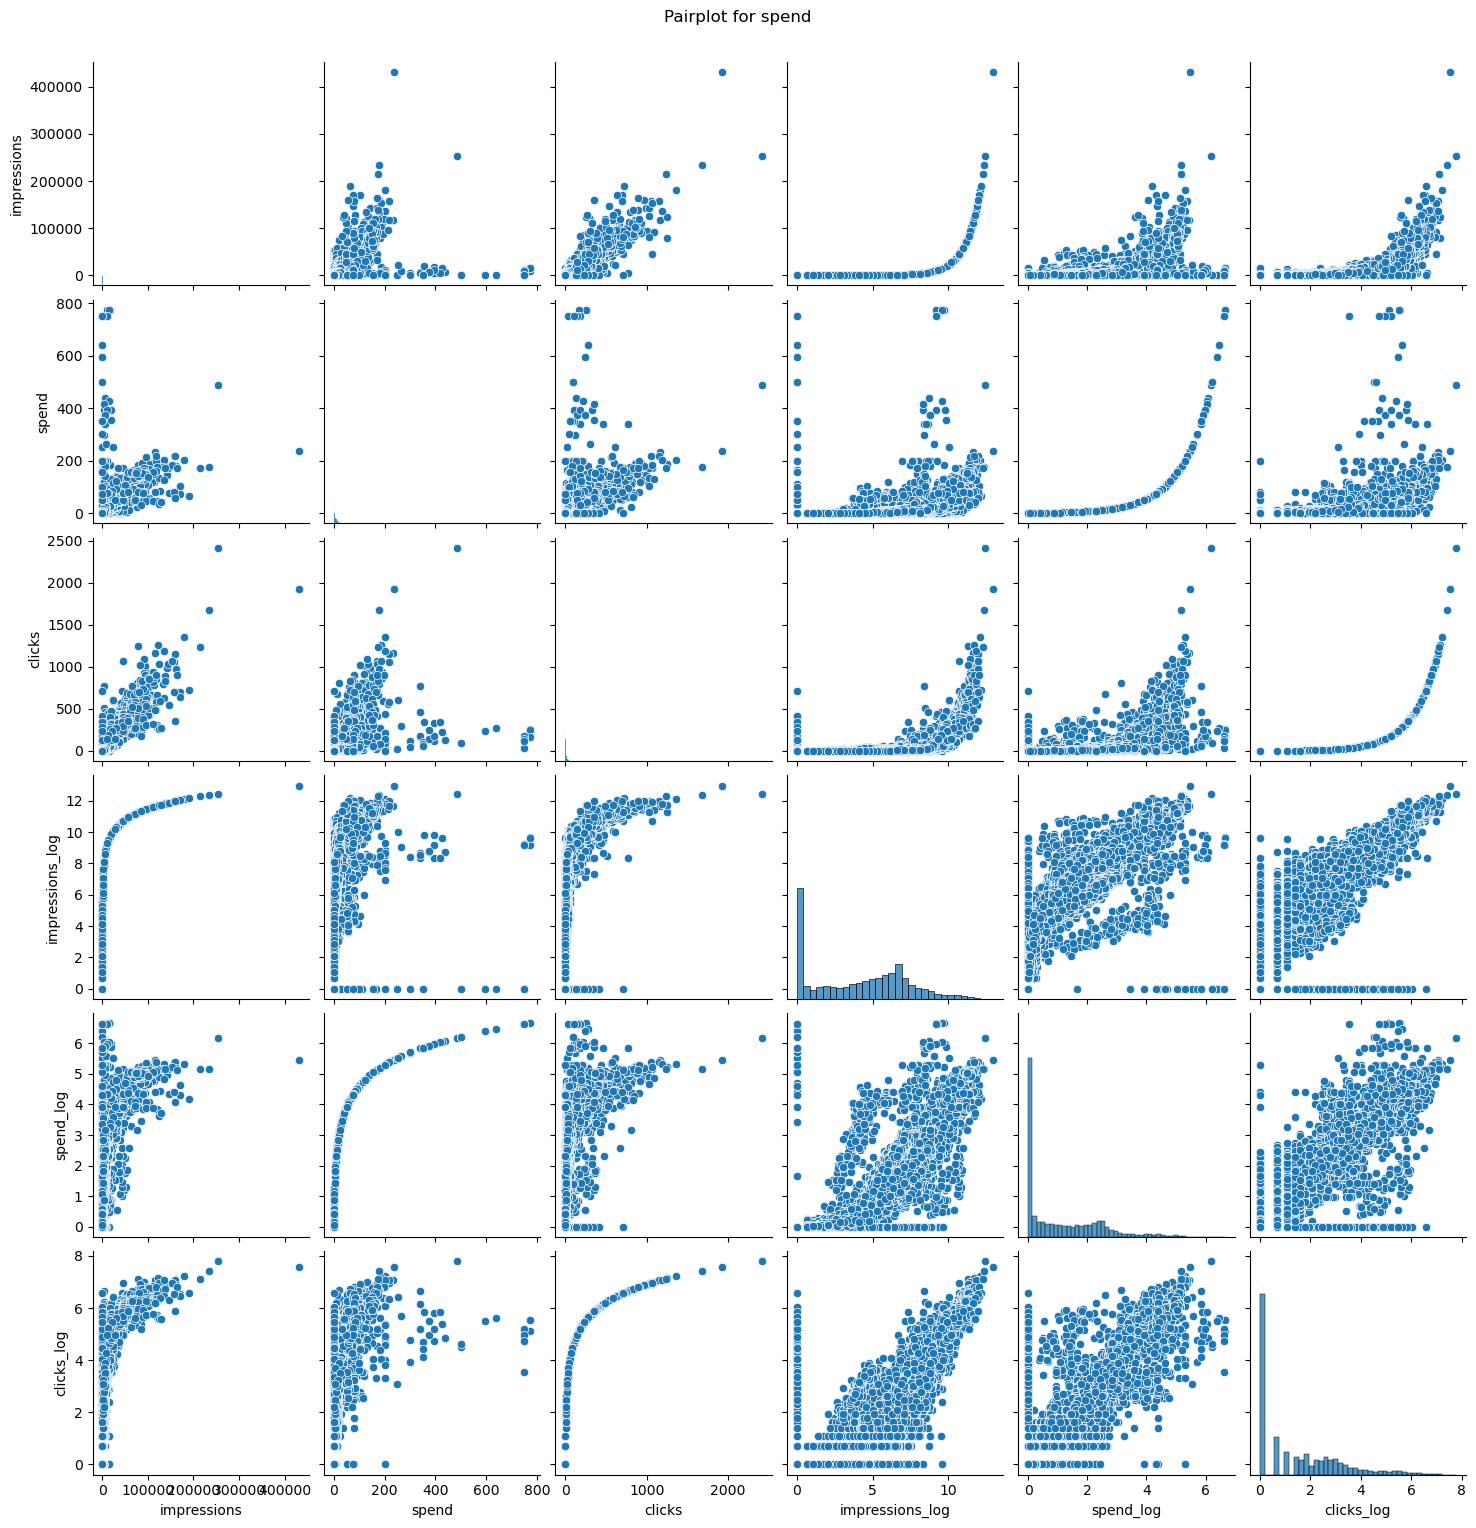

In [15]:
# Paired graph construction
for name in file_paths.keys():
    df = globals()[name]
    print(f'--- {name.upper()} ---')
    
    num_df = df.select_dtypes(include=['number'])

    if num_df.shape[1] < 2:
        print(f"Skipping {name} — not enough numeric columns for pairplot.")
        continue

    # pairplot
    sns.pairplot(num_df)
    plt.suptitle(f'Pairplot for {name}', y=1.02)
    plt.show()

--- CALLS ---


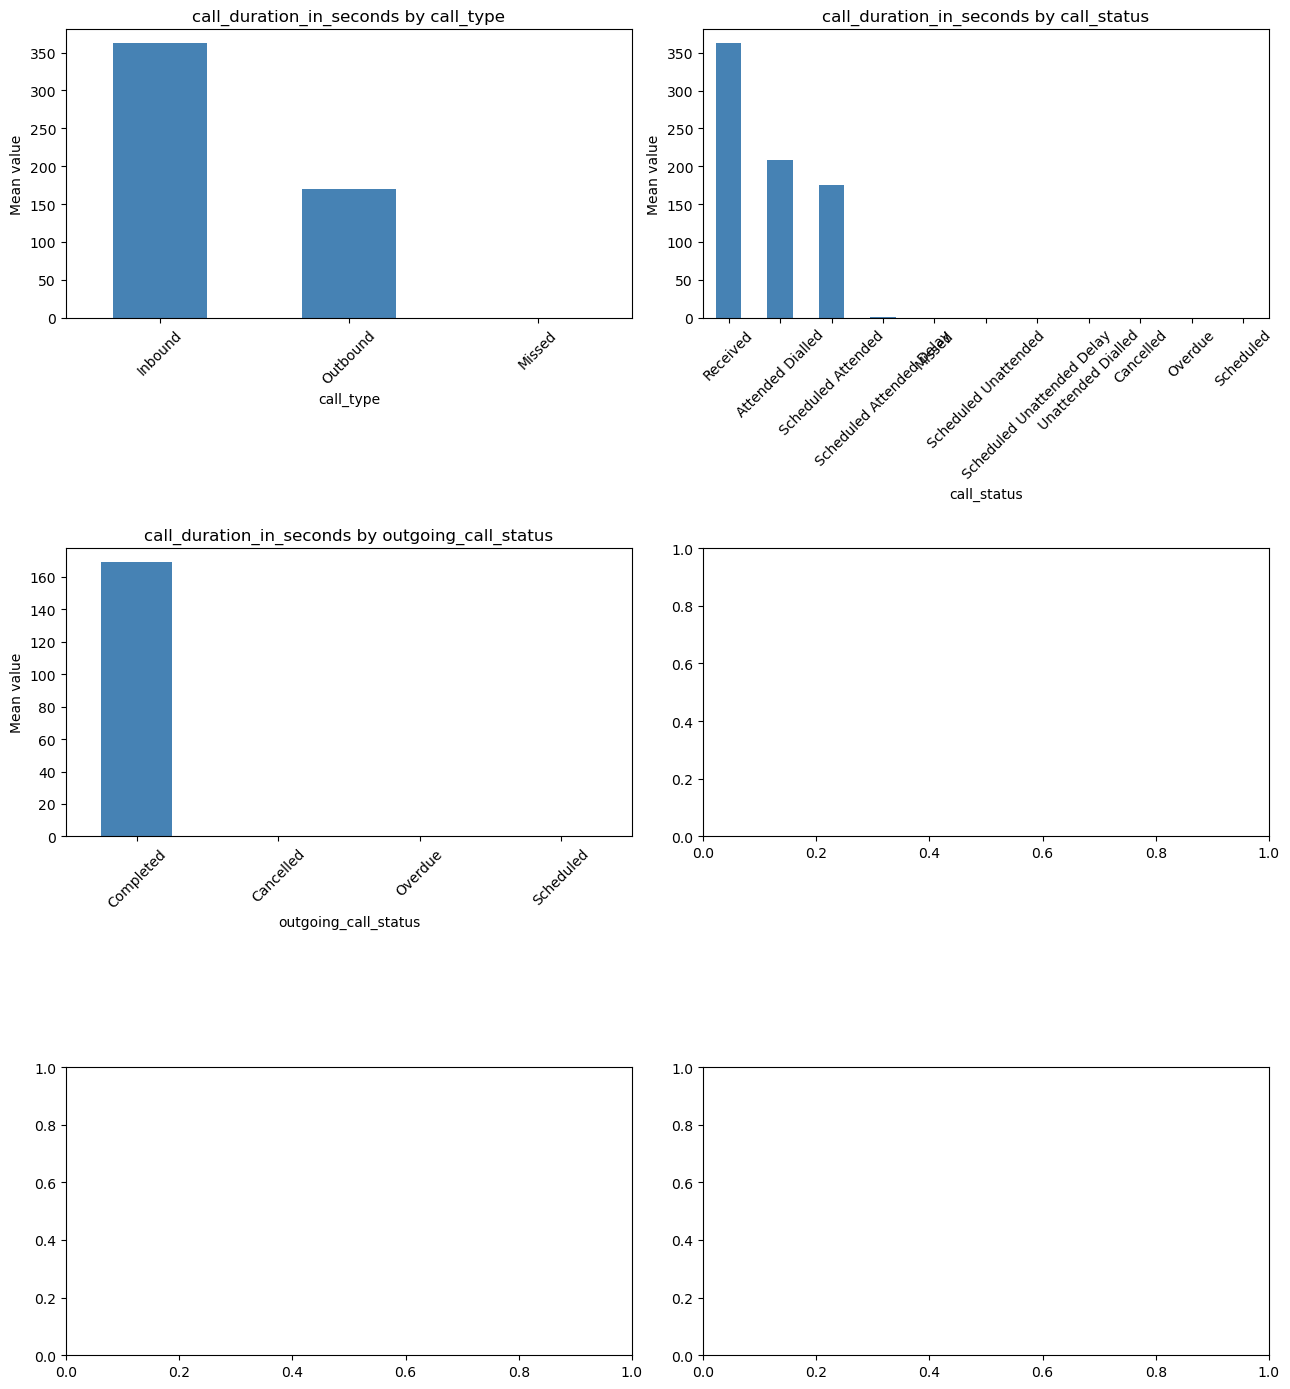

--- DEALS ---


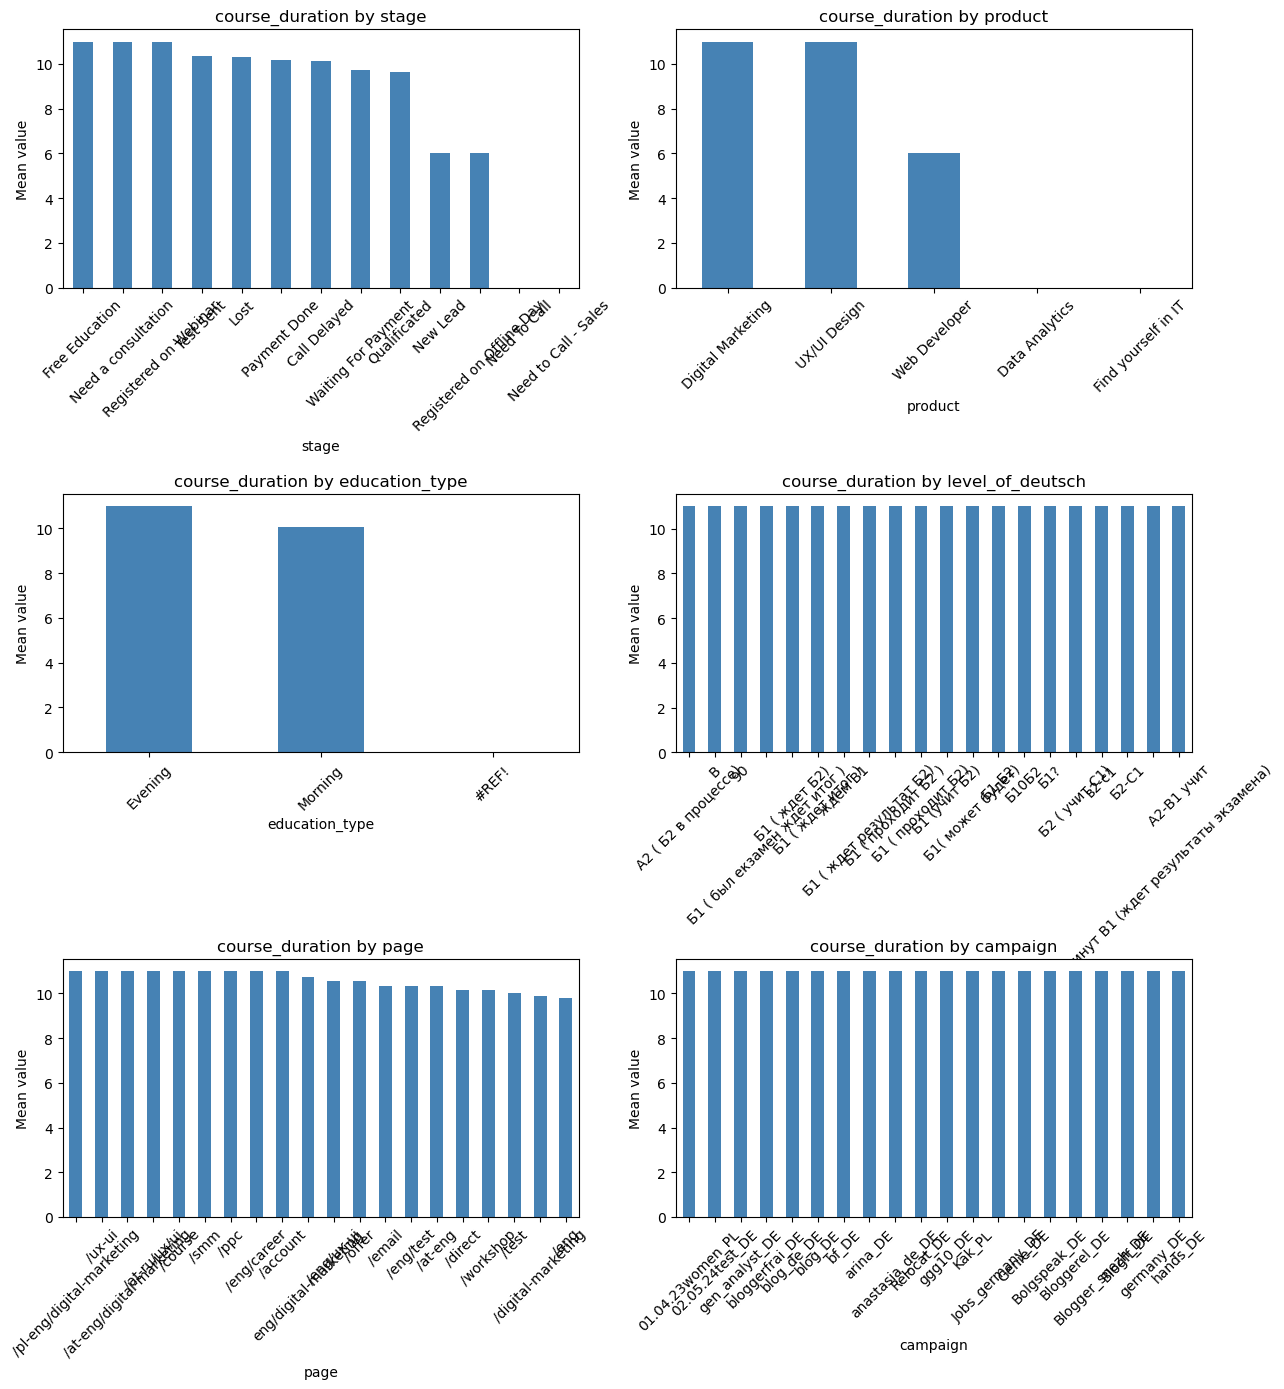

--- SPEND ---


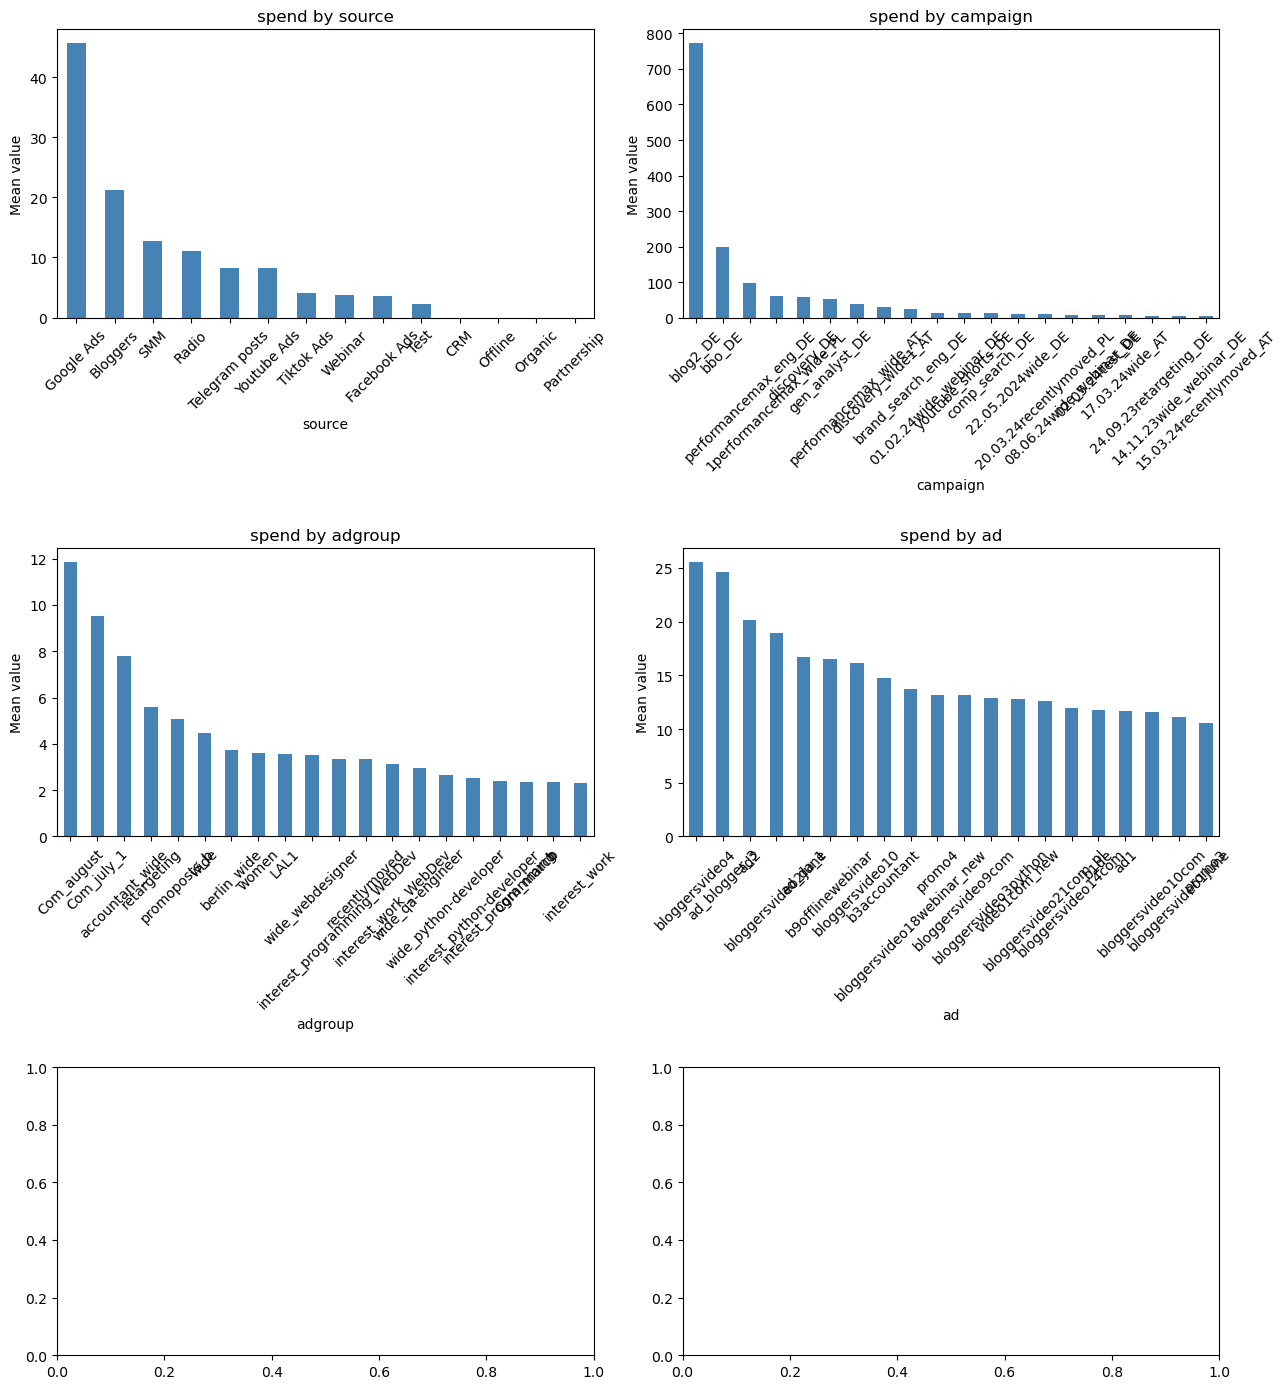

In [16]:
# Plotting bar charts
# Settings: what metrics to use for analysis
analysis_targets = {
    'calls': {
        'metric': 'call_duration_in_seconds',
        'cat_cols': ['call_type', 'call_status', 'outgoing_call_status']
    },
    'deals': {
        'metric': 'course_duration',
        'cat_cols': ['stage', 'product', 'education_type', 'level_of_deutsch', 'page', 'campaign']
    },
    'spend': {
        'metric': 'spend',
        'cat_cols': ['source', 'campaign', 'adgroup', 'ad']
    }
}

for name, config in analysis_targets.items():
    data = globals()[name]
    metric = config['metric']
    cat_cols = config['cat_cols'][:6]  # ограничим максимум 6 графиков

    print(f'--- {name.upper()} ---')

    fig, axarr = plt.subplots(3, 2, figsize=(13, 14))
    axarr = axarr.flatten()

    for i, col in enumerate(cat_cols):
        if col not in data.columns or metric not in data.columns:
            print(f"Skipping: '{col}' or metric '{metric}' not in {name}")
            continue

        try:
            mean_vals = data.groupby(col)[metric].mean().sort_values(ascending=False).head(20)
            mean_vals.plot.bar(ax=axarr[i], color='steelblue')
            axarr[i].set_title(f'{metric} by {col}')
            axarr[i].tick_params(axis='x', rotation=45)
            axarr[i].set_ylabel('Mean value')
        except Exception as e:
            print(f"Error plotting {name} - {col}: {e}")

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.8)
    plt.show()

--- Correlation Heatmap: CALLS ---


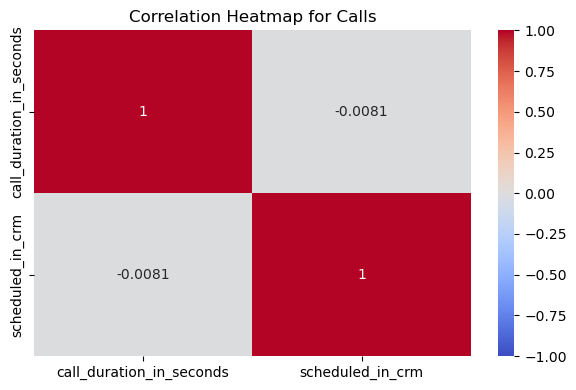

--- Correlation Heatmap: DEALS ---


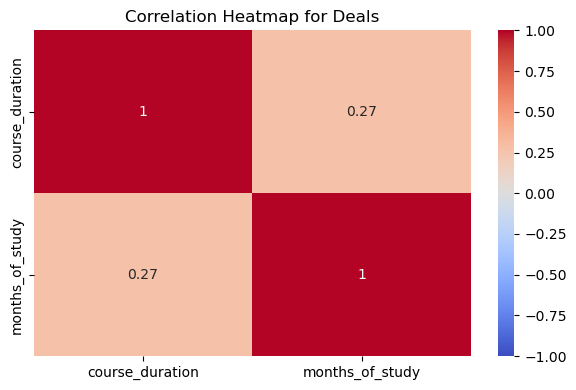

--- Correlation Heatmap: SPEND ---


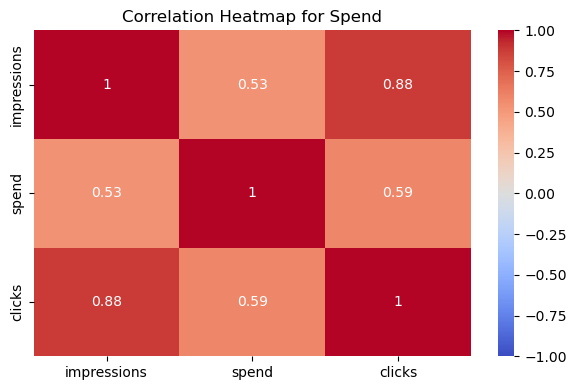

In [17]:
correlation_targets = {
    'calls': ['call_duration_in_seconds', 'scheduled_in_crm'],
    'deals': ['course_duration', 'months_of_study'],
    'spend': ['impressions', 'spend', 'clicks']
}

for name, columns in correlation_targets.items():
    df = globals()[name]

    missing_cols = [col for col in columns if col not in df.columns]
    if missing_cols:
        print(f"Skipping {name} — missing columns: {missing_cols}")
        continue

    corr_df = df[columns].corr()
    
    print(f'--- Correlation Heatmap: {name.upper()} ---')
    plt.figure(figsize=(6, 4))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title(f'Correlation Heatmap for {name.title()}')
    plt.tight_layout()
    plt.show()

### Работа в таблицей "Calls"
Remove zero values in Calls

In [18]:
calls.call_type.unique()
calls.outgoing_call_status.unique()

array([nan, 'Completed', 'Cancelled', 'Overdue', 'Scheduled'],
      dtype=object)

In [19]:
# Сводная по двум колонкам
# ищем закономерности в пропусках
# Строим сводную таблицу по call_type и outgoing_call_status
pivot_outgoing_call_status = calls.pivot_table(
    index='call_type',
    columns='outgoing_call_status',
    values='call_duration_in_seconds',
    aggfunc='count',
    fill_value=0
)

# Приводим к целочисленному виду
pivot_outgoing_call_status = pivot_outgoing_call_status.astype(int)

pivot_outgoing_call_status

outgoing_call_status,Cancelled,Completed,Overdue,Scheduled
call_type,,,,
Outbound,0,86792,0,0


In [20]:
# колонка "scheduled_in_crm"
print(calls['scheduled_in_crm'].value_counts(dropna=False))  # Подсчет всех значений, включая NaN

scheduled_in_crm
0.0    86733
NaN     8999
1.0      142
Name: count, dtype: int64


In [21]:
# ищем закономерности в пропущенных значениях
nan_rows = calls[calls['scheduled_in_crm'].isna()][['outgoing_call_status', 'scheduled_in_crm']]
print(nan_rows.scheduled_in_crm.unique())
print(nan_rows.outgoing_call_status.unique())

[nan]
[nan]


In [22]:
# Строим сводную таблицу по call_type и scheduled_in_crm
pivot_call_type = calls.pivot_table(
    index='call_type',
    columns='scheduled_in_crm',
    values='call_duration_in_seconds',
    aggfunc='count',
    fill_value=0
)

# Упорядочим столбцы по значению (0.0, 1.0) если они есть
pivot_call_type = pivot_call_type[[col for col in sorted(pivot_call_type.columns)]]
pivot_call_type

scheduled_in_crm,0.0,1.0
call_type,,
Outbound,86733,59


#### !Здесь график для тетрадки с аналитикой

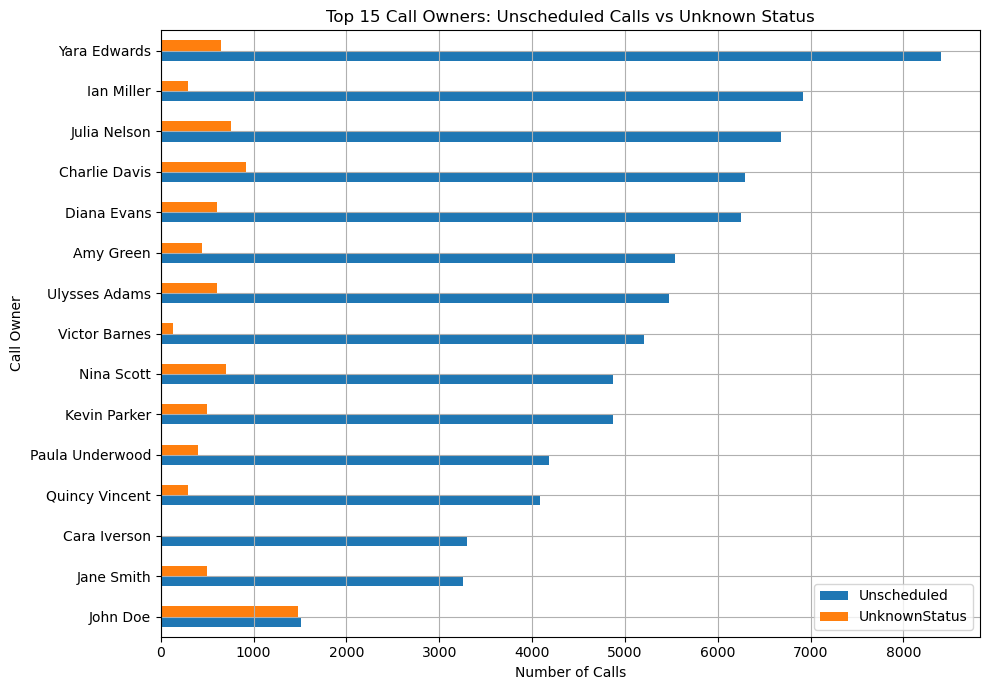

In [23]:
# Создаём два распределения:
# 1. Незапланированные звонки
unscheduled_counts = calls[calls['scheduled_in_crm'] == 0.0]['call_owner_name'].value_counts()

# 2. Звонки со статусом outgoing_call_status == 'Unknown'
unknown_status_counts = calls[calls['outgoing_call_status'].isna()]['call_owner_name'].value_counts()

# Объединяем оба распределения в один DataFrame
combined = pd.DataFrame({
    'Unscheduled': unscheduled_counts,
    'UnknownStatus': unknown_status_counts
}).fillna(0).astype(int)

# Оставим только топ-15 по сумме
top_owners = combined.sum(axis=1).sort_values(ascending=False).head(15)
combined_top = combined.loc[top_owners.index]

# Построим комбинированный график
combined_top.sort_values(by='Unscheduled', ascending=True).plot(
    kind='barh',
    figsize=(10, 7),
    title='Top 15 Call Owners: Unscheduled Calls vs Unknown Status'
)
plt.xlabel('Number of Calls')
plt.ylabel('Call Owner')
plt.grid(True)
plt.tight_layout()
plt.show()


#### !Здесь еще один график для тетрадки

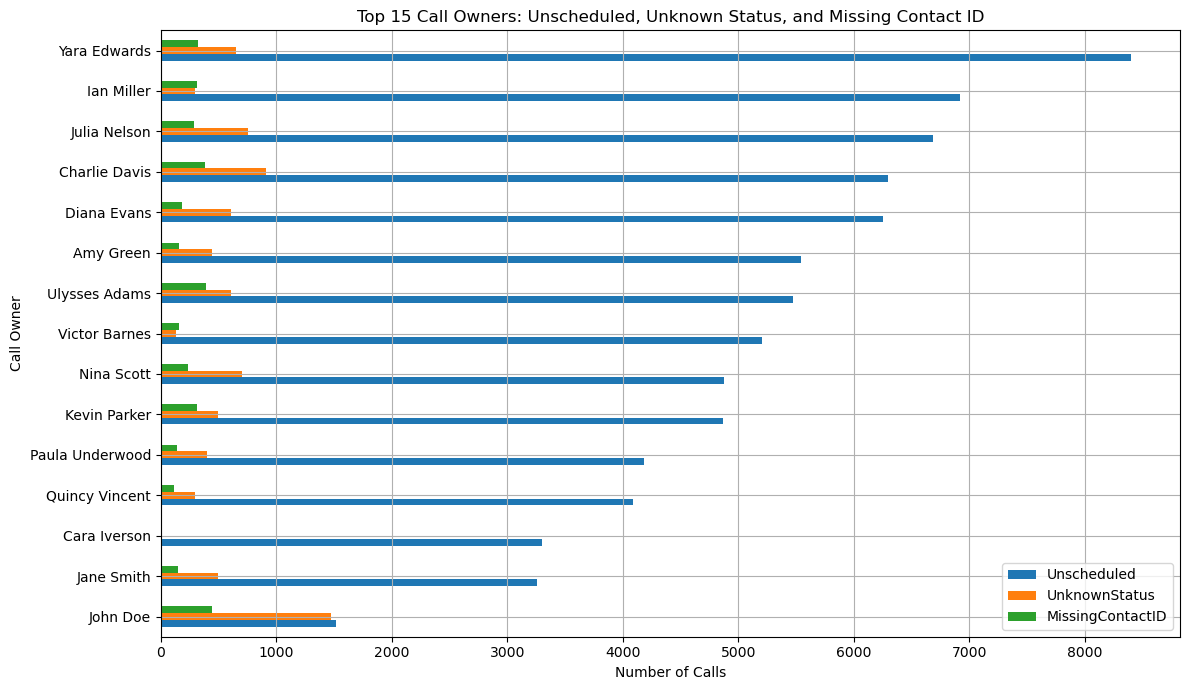

In [24]:
# Еще один график для поиска паттернов
# Создаём распределения:
unscheduled_counts = calls[calls['scheduled_in_crm'] == 0.0]['call_owner_name'].value_counts()
unknown_status_counts = calls[calls['outgoing_call_status'].isna()]['call_owner_name'].value_counts()
missing_contactid_counts = calls[calls['contactid'].isna()]['call_owner_name'].value_counts()

# Объединяем все три
combined = pd.DataFrame({
    'Unscheduled': unscheduled_counts,
    'UnknownStatus': unknown_status_counts,
    'MissingContactID': missing_contactid_counts
}).fillna(0).astype(int)

# Берём топ-15 по сумме всех
top_owners = combined.sum(axis=1).sort_values(ascending=False).head(15)
combined_top = combined.loc[top_owners.index]

# Строим комбинированный график
combined_top.sort_values(by='Unscheduled', ascending=True).plot(
    kind='barh',
    figsize=(12, 7),
    title='Top 15 Call Owners: Unscheduled, Unknown Status, and Missing Contact ID'
)
plt.xlabel('Number of Calls')
plt.ylabel('Call Owner')
plt.grid(True)
plt.tight_layout()
plt.show()

#### Пропуски в call_duration_in_seconds

In [25]:
# Отбираем строки с пропущенной длительностью звонка
calls_nan_duration = calls[calls['call_duration_in_seconds'].isna()][[
    'call_start_time', 
    'call_owner_name', 
    'contactid', 
    'call_type',
    'call_duration_in_seconds', 
    'call_status', 
    'outgoing_call_status',
    'scheduled_in_crm'
]]

# Группируем по комбинациям признаков для выявления закономерностей
pivot_call_duration_in_seconds = calls_nan_duration.groupby([
    'call_owner_name', 
    'call_type', 
    'call_status', 
    'outgoing_call_status',
    'scheduled_in_crm'
]).size().reset_index(name='count').sort_values(by='count', ascending=False)

pivot_call_duration_in_seconds

,call_owner_name,call_type,call_status,outgoing_call_status,scheduled_in_crm,count
7,Victor Barnes,Outbound,Overdue,Overdue,1.0,52
6,Victor Barnes,Outbound,Cancelled,Cancelled,1.0,14
4,Kevin Parker,Outbound,Overdue,Overdue,1.0,5
3,Kevin Parker,Outbound,Cancelled,Cancelled,1.0,4
8,Victor Barnes,Outbound,Scheduled,Scheduled,1.0,3
1,Eva Kent,Outbound,Overdue,Overdue,1.0,2
0,Eva Kent,Outbound,Cancelled,Cancelled,1.0,1
2,Julia Nelson,Outbound,Cancelled,Cancelled,1.0,1
5,Quincy Vincent,Outbound,Overdue,Overdue,1.0,1


In [26]:
calls.call_status.unique()

array(['Received', 'Attended Dialled', 'Unattended Dialled', 'Missed',
       'Cancelled', 'Scheduled Unattended', 'Overdue',
       'Scheduled Unattended Delay', 'Scheduled Attended',
       'Scheduled Attended Delay', 'Scheduled'], dtype=object)

### Работа с таблицей "Deals"
Пропуски присутствуют во всех столбцах. Некоторые достигают критического значения. Я не вижу смысла обрабатывать пропуски во всех столбцах, так как эта таблица необходима для продуктового анализа. Поэтому буду исходить из этого.

In [27]:
print('initial_amount_paid\n', deals.initial_amount_paid.unique())
print('-' * 40)
print('offer_total_amount\n', deals.offer_total_amount.unique())

initial_amount_paid
 [nan 0 1000 '€ 3.500,00' 500 100 4500 300 200 2000 11000 4000 3000 3500
 11500 1200 1500 1 5000 600 700 350 9 400 450]
----------------------------------------
offer_total_amount
 [nan 2000 9000 11000 3500 4500 '€ 2.900,00' 6500 4000 3000 10000 2500 5000
 11500 1 1000 1200 0 1500 '€ 11398,00' 11111 6000]


In [28]:
# Функция очистки числовых столбцов от лишних знаков
def clean_currency_columns(df, columns):
    """
    Очищает и преобразует валютные значения в числовой формат.
    
    Параметры:
        df (DataFrame): исходный датафрейм
        columns (list): список колонок, содержащих денежные строки
    
    Возвращает:
        df с обновлёнными колонками
    """
    for col in columns:
        if col in df.columns:
            df[col] = (
                df[col]
                .astype(str)
                .str.replace('€', '', regex=False)
                .str.replace('.', '', regex=False)  # удаляем разделитель тысяч
                .str.replace(',', '.', regex=False)  # заменяем запятую на точку
                .str.strip()
                .replace('nan', np.nan)
            )
            df[col] = pd.to_numeric(df[col], errors='coerce')
            print(f"Колонка '{col}' успешно преобразована в числовой формат.")
        else:
            print(f"Колонка '{col}' не найдена в датафрейме.")
    return df


In [29]:
currency_columns = ['initial_amount_paid', 'offer_total_amount']
deals = clean_currency_columns(deals, currency_columns)

Колонка 'initial_amount_paid' успешно преобразована в числовой формат.
Колонка 'offer_total_amount' успешно преобразована в числовой формат.


<Axes: >

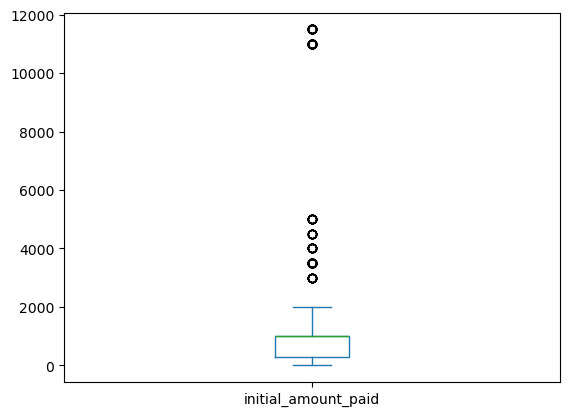

In [30]:
# Посмотрим разброс значений в числовых данных
deals.initial_amount_paid.plot.box()

<Axes: >

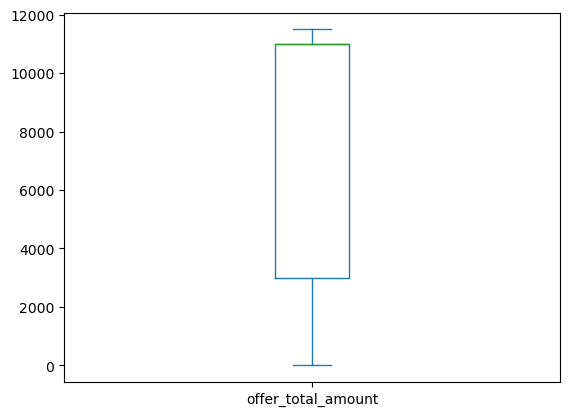

In [31]:
deals.offer_total_amount.plot.box()

In [32]:
# Проработка неполных дубликатов
deals_lost_reason = deals[deals['lost_reason'] == 'Duplicate']

# Подсчёт количества строк по id
dupe_counts = deals_lost_reason['id'].value_counts()

# Посмотреть только id с 2+ строками
dupe_ids = dupe_counts[dupe_counts > 1].index

# Фильтр по повторяющимся id
deals_duplicates_only = deals_lost_reason[deals_lost_reason['id'].isin(dupe_ids)]

In [33]:
deals_duplicates_only

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch
44,56704000.0,Ulysses Adams,20.06.2024,E - Non Qualified,Lost,Duplicate,/eng/test,NaN,NaN,NaN,...,NaN,NaN,20.06.2024 17:34,NaN,NaN,NaN,NaN,56727552.0,NaN,NaN
55,56704000.0,Ulysses Adams,20.06.2024,E - Non Qualified,Lost,Duplicate,/,NaN,NaN,NaN,...,NaN,NaN,20.06.2024 12:50,NaN,NaN,NaN,NaN,56727552.0,NaN,NaN
90,56369152.0,Ulysses Adams,19.06.2024,E - Non Qualified,Lost,Duplicate,/,NaN,00:01:46,NaN,...,NaN,NaN,19.06.2024 13:41,NaN,NaN,NaN,NaN,56391680.0,NaN,NaN
106,56369152.0,Ulysses Adams,NaN,E - Non Qualified,Lost,Duplicate,/,NaN,NaN,NaN,...,NaN,NaN,19.06.2024 11:07,NaN,NaN,NaN,NaN,56271872.0,NaN,NaN
109,56369152.0,Rachel White,19.06.2024,E - Non Qualified,Lost,Duplicate,/,NaN,NaN,NaN,...,NaN,NaN,19.06.2024 10:34,NaN,NaN,NaN,NaN,56391680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21514,1362944.0,Kevin Parker,11.07.2023,E - Non Qualified,Lost,Duplicate,eng/digital-marketing,02.07.23wide_DE,NaN,b3,...,NaN,NaN,10.07.2023 23:40,NaN,NaN,0.0,0.0,1400832.0,NaN,NaN
21517,1362944.0,Kevin Parker,10.07.2023,E - Non Qualified,Lost,Duplicate,eng/digital-marketing,03.07.23women,NaN,b3,...,NaN,NaN,10.07.2023 16:40,NaN,NaN,0.0,0.0,1362944.0,NaN,NaN
21528,1375232.0,Kevin Parker,10.07.2023,B - Medium,Lost,Duplicate,eng/digital-marketing,04.07.23recentlymoved_DE,01:29:31,b2,...,NaN,NaN,10.07.2023 08:32,NaN,NaN,0.0,0.0,1372160.0,NaN,NaN
21547,1375232.0,Kevin Parker,08.07.2023,E - Non Qualified,Lost,Duplicate,eng/digital-marketing,performancemax_digitalmarkt_ru_DE,NaN,_{region_name}_,...,NaN,NaN,08.07.2023 13:29,NaN,NaN,0.0,0.0,1347584.0,NaN,NaN


In [34]:
# Подсчитаем количество строк по каждой стадии среди дубликатов
stage_summary = deals_duplicates_only['stage'].value_counts().reset_index()
stage_summary[['stage', 'count']]

,stage,count
0,Lost,398
1,Registered on Offline Day,3
2,Registered on Webinar,1


In [35]:
# 1. Удаляем только дубликаты со статусом "Lost"
duplicates_to_drop = deals[
    (deals['lost_reason'] == 'Duplicate') &
    (deals['stage'] == 'Lost')
]

deals = deals.drop(index=duplicates_to_drop.index)


def last_valid(series):
    """Возвращает последнее непустое значение"""
    non_nulls = series.dropna()
    return non_nulls.iloc[-1] if not non_nulls.empty else None

# 2. Отфильтровываем активные дубликаты (не Lost)
to_merge = deals[
    (deals['lost_reason'] == 'Duplicate') &
    (deals['stage'] != 'Lost')
]

# 3. Группируем и объединяем
merged_duplicates = to_merge.groupby('contact_name', observed=True).agg({
    'deal_owner_name': last_valid,
    'closing_date': last_valid,
    'quality': last_valid,
    'stage': last_valid,
    'lost_reason': 'first',
    'page': last_valid,
    'campaign': last_valid,
    'sla': last_valid,
    'content': last_valid,
    'term': last_valid,
    'source': last_valid,
    'payment_type': last_valid,
    'product': last_valid,
    'education_type': last_valid,
    'created_time': last_valid,
    'course_duration': last_valid,
    'months_of_study': last_valid,
    'initial_amount_paid': 'sum',
    'offer_total_amount': 'sum',
    # 'contact_name': last_valid,
    'city': last_valid,
    'level_of_deutsch': last_valid
}).reset_index()

# 4. Удаляем старые строки
deals = deals.drop(index=to_merge.index)

# 5. Добавляем объединённые дубликаты
deals = pd.concat([deals, merged_duplicates], ignore_index=True)

In [36]:
deals[
    (deals['lost_reason'] == 'Duplicate')
].head()

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,product,education_type,created_time,course_duration,months_of_study,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch
19822,NaN,Julia Nelson,10.10.2023,D - Non Target,Call Delayed,Duplicate,/workshop,web2408_DE,"29 days, 23:04:19",None,...,None,None,19.08.2023 13:35,NaN,NaN,0.0,0.0,1128448.0,None,None
19823,NaN,Diana Evans,None,None,Registered on Webinar,Duplicate,/workshop,None,None,None,...,None,None,19.08.2023 17:41,NaN,NaN,0.0,0.0,4743168.0,None,None
19824,NaN,Charlie Davis,05.03.2024,D - Non Target,Call Delayed,Duplicate,/eng/test,None,18:21:16,None,...,None,None,04.03.2024 18:22,NaN,NaN,0.0,0.0,5107712.0,None,None
19825,NaN,Julia Nelson,None,None,Registered on Offline Day,Duplicate,/event,None,None,None,...,None,None,15.02.2024 19:59,NaN,NaN,0.0,0.0,7856128.0,None,None
19826,NaN,Ulysses Adams,None,None,Registered on Offline Day,Duplicate,/event,None,None,None,...,None,None,16.02.2024 18:05,NaN,NaN,0.0,0.0,14059520.0,None,None


In [37]:
# разделяем столбец term на два независимых, изначальный оставляем как есть
def split_term_column(term_value):
    if pd.isna(term_value):
        return (None, None)
    
    term_value = str(term_value).strip()
    
    # Проверка на формат даты "дд_мм_гггг"
    date_match = re.match(r'^(\d{2}_\d{2}_\d{4})$', term_value)
    if date_match:
        return (date_match.group(1), None)
    
    # Если дата — часть строки (например: "03_05_2024 webinar")
    embedded_date = re.match(r'^(\d{2}_\d{2}_\d{4})[\s_-]+(.+)', term_value)
    if embedded_date:
        return (embedded_date.group(1), embedded_date.group(2).strip())

    # Всё остальное — это просто текст
    return (None, term_value)

# Применим
deals[['term_date', 'term_notes']] = deals['term'].apply(lambda x: pd.Series(split_term_column(x)))

# Преобразуем строку формата 'дд_мм_гггг' в datetime
deals['term_date'] = pd.to_datetime(deals['term_date'], format='%d_%m_%Y', errors='coerce')

In [38]:
deals.term_notes.unique()
# print(deals['term'].dtype)

array(['women', None, 'recentlymoved', 'Com_august', 'it career hub',
       'interest_work', 'wide', 'retargeting', 'LAL1', 'invitation',
       'ich', 'it%20career%20hub', 'invitation\\', '_',
       'interest_programming_WebDev', 'itcareerhub', 'it career hub_',
       'interest_work_WebDev', 'lost_does_not_answer', 'айти карьер хаб',
       'it hub', '1_day_before', 'berlin_wide', 'accountant_wide', 'b',
       '1_05_2024', 'Com_march', 'qual',
       'recentlymovedhttps://itcareerhub.de/ru/questionnaire?utm_source=facebook',
       'day_2', 'ntc_lost', 'wide_python-developer', '120202614050220341',
       'wide_qa-engineer', 'wide_webdesigner', 'qual_com lost',
       'registered', 'allthinking lost', 'all', 'Com_july_1',
       'allcomlost', 'аналитик данных обучение', 'data analyst курсы',
       'курсы аналитик данных', 'обучение на аналитика данных',
       'курсы data analyst', 'data analyst', 'дата аналитик это',
       'курсы по дата аналитике', 'Com_and_gov', 'курсы аналит

In [39]:
# преобразуем в формат deltatime
def convert_to_timedelta(value):
    if pd.isna(value):
        return pd.NaT
    elif isinstance(value, timedelta):
        return value
    elif isinstance(value, time):
        return timedelta(hours=value.hour, minutes=value.minute, seconds=value.second)
    else:
        return pd.NaT  # на случай неожиданных типов

# Преобразуем столбец
deals['sla'] = deals['sla'].apply(convert_to_timedelta)

In [40]:
deals.sla.unique()

<TimedeltaArray>
[               NaT,  '0 days 00:26:43',  '0 days 01:00:04',
  '0 days 00:53:12',  '0 days 01:33:10',  '0 days 02:12:29',
  '0 days 00:10:08',  '0 days 02:33:19',  '0 days 00:59:25',
  '0 days 00:58:03',
 ...
 '70 days 23:12:53', '71 days 00:46:22', '56 days 19:01:59',
  '4 days 22:47:14', '29 days 23:04:19',  '0 days 18:21:16',
  '0 days 19:24:27',  '2 days 17:15:07',  '0 days 04:50:33',
  '0 days 01:24:30']
Length: 12951, dtype: timedelta64[ns]

In [41]:
# Выделяем город из полного адреса в колонке city
dict_city_replace = {
    'Karl-Liebknecht str. 24, Hildburghausen, Thüringen': 'Hildburghausen',
    'Poland , Gdansk , Al. Grunwaldzka 7, ap. 1a': 'Gdansk',
    'Vor Ebersbach 1, 77761 Schiltach': 'Schiltach',
    'Gdańsk': 'Gdansk',
    'Frankfurt': 'Frankfurt am Main'
}

deals['city'] = deals['city'].replace(dict_city_replace)

In [42]:
deals['product'].unique()

array([nan, 'Web Developer', 'Digital Marketing', 'UX/UI Design',
       'Find yourself in IT', 'Data Analytics', None], dtype=object)

In [43]:
deals = deals[deals['id'].notna()] # удаляем одну строку без id

In [44]:
# источник лида
print(deals.source.unique())
deals.source.nunique()

['Facebook Ads' 'Organic' 'Telegram posts' 'Google Ads' 'Youtube Ads'
 'CRM' 'SMM' 'Tiktok Ads' 'Bloggers' 'Webinar' 'Partnership' 'Test'
 'Offline']


13

In [45]:
print(deals.campaign.unique())
deals.campaign.nunique()

['03.07.23women' nan 'engwien_AT' '04.07.23recentlymoved_DE'
 'discovery_DE' 'youtube_shorts_DE' 'brand_search_eng_DE' '1406start'
 '20.05.24interests_DE' 'performancemax_eng_DE' '12.07.2023wide_DE'
 '1006start' '24.09.23retargeting_DE' 'germany_DE'
 'performancemax_wide_AT' '07.07.23LAL_DE' 'webinar1906' 'germania_DE'
 '02.07.23wide_DE' '22.05.2024wide_DE' 'blog_DE' 'blog2_DE'
 '17.03.24wide_AT' '12.06.24wide_DE' 'Jobs_germany_DE' '2005_Lost_DE'
 'uk_DE' '08.04.24wide_webinar_DE' '08.06.24wide_webinar_DE' 'Akademia'
 'BloggerIvan' 'Genie_DE' 'Live_DE' '1706_DE'
 'performancemax_digitalmarkt_ru_DE' '12.09.23interests_Uxui_DE' '5555_DE'
 'ASA_de_DE' '2905start' 'webinar1604' 'bloggerfrai_DE' 'bloggerdr_DE'
 'Trigger_DE' 'Bloggerel_DE' 'Forum_DE' 'Consult_DE' 'work_DE'
 'Bolgspeak_DE' 'tyk_DE' 'of_DE' 'Berlin_DE' 'Markt_DE' 'BloggerShina_DE'
 '09.02.24berlin_dd_DE' '20.05.24wide_DE' 'Relocat_DE' 'col_DE'
 'Blogff_DE' 'eha_DE' 'jet_DE' '02.05.24test_DE' '1005start'
 'workingin_DE' 'bbo_DE

153

<Axes: ylabel='campaign'>

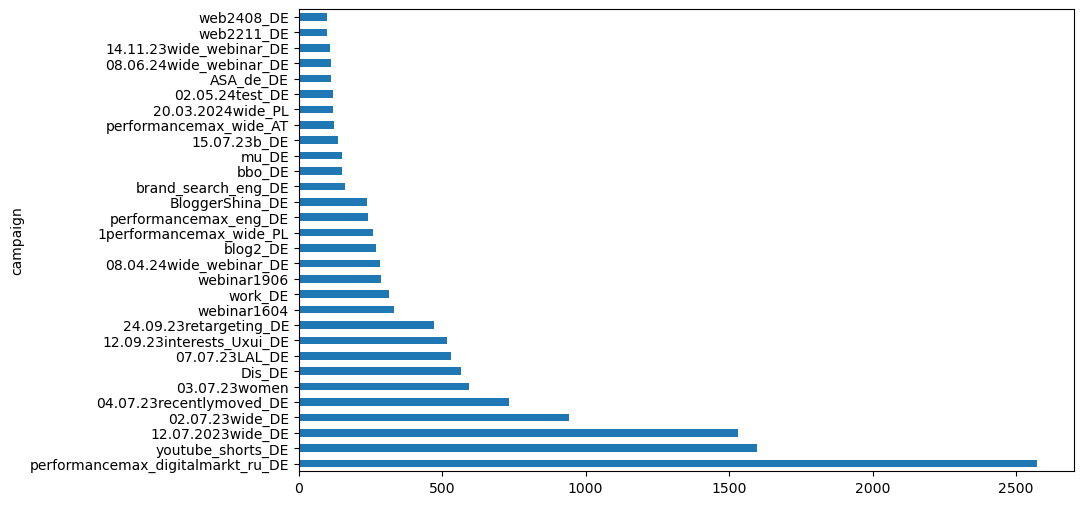

In [46]:
deals['campaign'].value_counts().head(30).plot(kind='barh', figsize=(10, 6))

In [47]:
def split_campaign_column(df, column='campaign'):
    df[column] = df[column].fillna('unknown').str.strip().str.lower()

    def extract_date(c):
        match = re.search(r'\d{2}[.\-]\d{2}[.\-]?\d{2,4}', c)
        return match.group(0).replace('-', '.') if match else 'nodate'

    def extract_type(c):
        keywords = [
            'wide', 'women', 'interests', 'lal', 'lviv', 'mailreg', 'blog', 'blogger', 'search',
            'shorts', 'retargeting', 'test', 'discovery', 'bbo', 'webinar', 'akademia', 'relocat',
            'recentlymoved', 'gen_analyst', 'performancemax', 'start', 'referral', 'youtube',
            '2day', 'web', 'liveberlin', 'domain', 'work_wr', 'forum', 'dis', 
            'work', 'mu'
        ]
        for kw in keywords:
            if kw in c:
                return kw
        return 'other'

    def extract_country(c):
        match = re.search(r'(de|pl|at)(?![a-z])', c)
        return match.group(0) if match else 'unknown'

    def parse_date_safe(date_str):
        try:
            return pd.to_datetime(date_str, dayfirst=True, errors='coerce')
        except:
            return pd.NaT

    # Применение
    df['campaign_date'] = df[column].apply(extract_date)
    df['campaign_type'] = df[column].apply(extract_type)
    df['campaign_country'] = df[column].apply(extract_country)
    df['campaign_date'] = df['campaign_date'].apply(parse_date_safe)

    return df

# Применяем
deals = split_campaign_column(deals)

# Проверка
display(deals[['campaign', 'campaign_date', 'campaign_type', 'campaign_country']])

,campaign,campaign_date,campaign_type,campaign_country
0,03.07.23women,2023-07-03,women,unknown
1,unknown,NaT,other,unknown
2,engwien_at,NaT,other,at
3,04.07.23recentlymoved_de,2023-07-04,recentlymoved,de
4,discovery_de,NaT,discovery,de
...,...,...,...,...
19815,02.07.23wide_de,2023-07-02,wide,de
19816,03.07.23women,2023-07-03,women,unknown
19817,02.07.23wide_de,2023-07-02,wide,de
19818,03.07.23women,2023-07-03,women,unknown


In [48]:
deals.quality.unique()

array([nan, 'D - Non Target', 'E - Non Qualified', 'B - Medium',
       'C - Low', 'A - High'], dtype=object)

In [49]:
deals[deals['quality'] == 'F']

,id,deal_owner_name,closing_date,quality,stage,lost_reason,page,campaign,sla,content,...,initial_amount_paid,offer_total_amount,contact_name,city,level_of_deutsch,term_date,term_notes,campaign_date,campaign_type,campaign_country


In [50]:
deals = deals[deals['quality'] != 'F']

In [51]:
deals_lost_reason['quality'].value_counts(dropna=False)

quality
E - Non Qualified    1489
D - Non Target        170
C - Low                56
B - Medium             21
NaN                    17
A - High               14
F                       3
Name: count, dtype: int64

In [52]:
# заменим пропуски на "E - Non Qualified "
deals['quality'] = deals['quality'].fillna('E - Non Qualified')

In [53]:
deals.stage.unique()

array(['New Lead', 'Lost', 'Need a consultation', 'Need To Call',
       'Call Delayed', 'Qualificated', 'Registered on Webinar',
       'Waiting For Payment', 'Need to Call - Sales', 'Test Sent',
       'Payment Done', 'Registered on Offline Day', 'Free Education'],
      dtype=object)

In [54]:
deals.lost_reason.unique()

array([nan, 'Non target', 'Invalid number', 'Inadequate', 'Expensive',
       'needs time to think', 'Not for myself',
       'Considering a different direction in IT', "Doesn't Answer",
       'Changed Decision', 'The contract did not fit',
       'Stopped Answering', 'Gutstein refusal',
       "Didn't leave an application",
       'Does not know how to use a computer',
       'Conditions are not suitable', 'Thought for free',
       'Does not speak English', 'Went to Rivals', 'Next stream',
       'Refugee'], dtype=object)

In [55]:
# создаем колонку с укрупненным группами
def map_lost_reason_group(reason):
    if pd.isna(reason):
        return 'Missing'

    reason = reason.lower()
    
    if reason in ['non target', 'refugee', 'does not know how to use a computer', 'does not speak english']:
        return 'Not Target Audience'
    elif reason in ['expensive', 'thought for free', 'conditions are not suitable']:
        return 'Financial Objection'
    elif reason in ['invalid number', 'duplicate', "didn't leave an application"]:
        return 'Technical or Input Error'
    elif reason in ['changed decision', 'needs time to think', 'not for myself', 'considering a different direction in it', 'next stream']:
        return 'Changed Mind or Plans'
    elif reason in ["doesn't answer", 'stopped answering']:
        return 'No Response'
    elif reason in ['gutstein refusal', 'the contract did not fit']:
        return 'Other Rejection'
    elif reason in ['inadequate']:
        return 'Problematic Contact'
    elif reason in ['went to rivals']:
        return 'Lost to Competitor'
    else:
        return 'Other'

# Применим к колонке:
deals['lost_reason_group'] = deals['lost_reason'].apply(map_lost_reason_group)

In [56]:
deals.page.unique()

array(['/eng/test', '/at-eng', '/eng', 'eng/digital-marketing', '/email',
       '/at-eng/digital-marketing', '/eng/ux-ui', '/direct', '/',
       '/webinar', '/at-end/web-developer', 'eng/web-developer',
       '/specialoffer', '/pl-eng', '/pl-eng/web-developer',
       '/digital-marketing', '/ux-ui', '/web-developer', '/test',
       '/eng/career', '/account', '/at-ru/ux/ui',
       '/pl-eng/digital-marketing', '/pl-eng/ux-ui',
       '/at/digital-marketing', '/page', '/event', '/workshop',
       '/welcomepage', '/smm', '/ppc', '/offer', '/course'], dtype=object)

In [57]:
deals.content.unique()

array(['v16', nan, 'b1-at', 'bloggersvideo14com', 'website',
       'bloggersvideo2june', '152789402780_{region_name}_695563281558',
       'v15', '_{region_name}_', 'bloggersvideo16com', 'b9',
       'search_terms', 'bloggersvideo9com', 'b4python-developer',
       'bloggersvideo11', 'Audience', 'bloggersvideo10',
       'bloggersvideo23com', 'bloggersvideo25com', 'bloggersvideo12com',
       '152789402780_{region_name}_668024583824', 'bloggersvideo24com',
       'bloggersvideo16com_at', 'bloggersjune17', 'bloggersvideo1june',
       'b0', 'bloggersvideo15com',
       '151836595805_{region_name}_699672039100', 'v7webinar',
       'bloggersvideo18webinar', 'v6webinar',
       '151836595805_{region_name}_699672039103', 'bloggersvideo1webinar',
       '151836595805_{region_name}_699672039109', 'bloggersvideo2webinar',
       'bloggersvideo18com', 'bloggersvideo12com_at',
       '151836595805_{region_name}_699672039106', 'bloggersvideo19com',
       '151836595805_{region_name}_67380133699

In [58]:
def categorize_content(value):
    if pd.isna(value):
        return 'Missing'
    
    val = value.lower()
    
    if val.startswith('bloggersvideo') or val.startswith('bloggervideo') or 'video' in val:
        return 'Bloggers Video'
    elif 'webinar' in val:
        return 'Webinar Tag'
    elif val.startswith('v') and any(char.isdigit() for char in val):
        return 'Version Tag'
    elif 'python-developer' in val or 'qa-engineer' in val or 'webdesigner' in val or 'accountant' in val or 'webdev' in val:
        return 'Professional Track'
    elif val.startswith('ad') or val.startswith('mail') or 'region_name' in val or 'qrcode' in val:
        return 'UTM / Tracking Tag'
    elif val.startswith('b') and any(char.isdigit() for char in val):
        return 'Country / B-Version'
    elif val in ['website', 'search_terms', 'invitation', 'new_leads']:
        return 'Generic Label'
    else:
        return 'Other'

# Применяем к колонке
deals['content_group'] = deals['content'].apply(categorize_content)

In [59]:
# Дозаполняем колонку
def infer_content_group_from_all(row):
    if pd.notna(row['content_group']) and row['content_group'] != 'Missing':
        return row['content_group']
    
    # По page
    if isinstance(row['page'], str):
        page = row['page'].lower()
        if 'webinar' in page:
            return 'Webinar Tag'
        elif 'video' in page or 'bloggersvideo' in page:
            return 'Bloggers Video'
        elif any(x in page for x in ['digital-marketing', 'ux-ui', 'web-developer']):
            return 'Professional Track'

    # По campaign
    if isinstance(row['campaign'], str):
        camp = row['campaign'].lower()
        if 'webinar' in camp:
            return 'Webinar Tag'
        elif 'video' in camp or 'bloggers' in camp:
            return 'Bloggers Video'
        elif 'ad' in camp or 'mail' in camp:
            return 'UTM / Tracking Tag'

    # По term_notes
    if isinstance(row['term_notes'], str):
        note = row['term_notes'].lower()
        if any(x in note for x in ['qa', 'python', 'ux', 'web']):
            return 'Professional Track'
        elif 'webinar' in note:
            return 'Webinar Tag'

    # По source
    if isinstance(row['source'], str):
        source = row['source'].lower()
        if 'webinar' in source:
            return 'Webinar Tag'
        elif 'bloggers' in source:
            return 'Bloggers Video'
        elif any(x in source for x in ['facebook', 'google', 'youtube', 'tiktok']):
            return 'UTM / Tracking Tag'
        elif 'telegram' in source or 'smm' in source:
            return 'Generic Label'

    return 'Other'

deals['content_group'] = deals.apply(infer_content_group_from_all, axis=1)

In [60]:
deals.payment_type.unique()

array([nan, 'One Payment', 'Recurring Payments', 'Reservation'],
      dtype=object)

In [61]:
product_mapping = {
    'Data Analytics': (
        'data analyst',
        'data analyst курсы',
        'курсы аналитик данных',
        'обучение на аналитика данных',
        'дата аналитик курсы',
        'аналитик в it обучение',
        'аналитиквitобучение',
        'аналитика данных с нуля',
        'дата аналитик это',
        'дата аналитика',
        'data analysis analytics',
        'курсы аналитика с нуля',
        'data analyst обучение',
        'курсы по дата аналитике',
        'аналитик данных обучение',
    ),
    'Web Developer': (
        'interest_programming_WebDev',
        'interest_work_WebDev',
        'wide_python-developer',
        'wide_qa-engineer',
    ),
    'UX/UI Design': (
        'wide_webdesigner',
    ),
    'Find yourself in IT': (
        'interest_all'
    ),
}

def infer_product_from_term(term):
    if pd.isna(term):
        return None
    term = str(term).lower()
    for product, keywords in product_mapping.items():
        if any(kw.lower() in term for kw in keywords):
            return product
    return None

mask = deals['product'].isna()
inferred_products = deals.loc[mask, 'term_notes'].apply(infer_product_from_term)
deals.loc[mask, 'product'] = inferred_products

In [62]:
def infer_product_from_page(page):
    if pd.isna(page):
        return None
    page = page.lower()
    if 'web-developer' in page:
        return 'Web Developer'
    elif 'ux-ui' in page or 'ux/ui' in page:
        return 'UX/UI Design'
    elif 'digital-marketing' in page:
        return 'Digital Marketing'
    else:
        return None  # или 'Other', если хочешь явно

# Применим только к строкам, где product == None
mask = deals['product'].isna()
deals.loc[mask, 'product'] = deals.loc[mask, 'page'].apply(infer_product_from_page)

In [63]:
def infer_product_from_content(content):
    if pd.isna(content):
        return None
    content = content.lower()
    
    if 'python-developer' in content or 'qa-engineer' in content or 'webdesigner' in content or 'webdev' in content:
        return 'Web Developer'
    elif 'ux-ui' in content or 'uxui' in content:
        return 'UX/UI Design'
    elif 'digital-marketing' in content or 'smm' in content or 'ppc' in content:
        return 'Digital Marketing'
    elif 'data-analytics' in content or 'ad_da' in content or 'da' in content:
        return 'Data Analytics'
    elif 'find-yourself' in content or 'career' in content:
        return 'Find yourself in IT'
    else:
        return None

# Только к тем, у кого product всё ещё пустой
mask_still_empty = deals['product'].isna()
deals.loc[mask_still_empty, 'product'] = deals.loc[mask_still_empty, 'content'].apply(infer_product_from_content)

In [64]:
campaign_to_product = {
    'interestswebdev': 'Web Developer',
    'interestsuxui': 'UX/UI Design',
    'interestspython': 'Web Developer',
    'interestsdata': 'Data Analytics',
}

def infer_product_from_campaign(row):
    if row['product'] in [None, '', 'Interest Not Identified', np.nan]:
        campaign = str(row['campaign']).lower().strip()
        for key, product in campaign_to_product.items():
            if key in campaign:
                return product
    return row['product']  # оставить как есть

deals['product'] = deals.apply(infer_product_from_campaign, axis=1)

In [65]:
print(deals['product'].value_counts(dropna=False))  # все значения

product
Find yourself in IT    7496
None                   5707
Digital Marketing      3428
Web Developer          1641
UX/UI Design           1495
Data Analytics           53
Name: count, dtype: int64


In [66]:
deals['product'] = deals['product'].fillna("Interest Not Identified")

In [67]:
deals.education_type.unique()

array([nan, 'Morning', 'Evening'], dtype=object)

In [68]:
deals.level_of_deutsch.unique()

array([nan, 'в1', 'A2', 'б1', 'b1', 'B1', 'в1-в2', 'B2', 'C2', 'с1', 'Б1',
       'а2', 'а1', 'а0', 'б2', 'Б2', 'В1', 'А2',
       'B1 будет в феврале 2025', 'Detmold, Paulinenstraße 95, 32756',
       'Сам оценивает на B2, 13 лет живет в Германии', 'в2', 'В1-В2',
       'Б1 ( ждет Б2)', 'А2-В1',
       'lэкзамен - 6 июля на В1. курсы вечером (но уверенно говорит на B1)',
       'Гражданка Германии уже год в Германии Учит немецкий и в сентябре b1 через гос-во проходит, а не через ДЖЦ, вечером учится 3 р в неделю с 18 до 21',
       '-', 'А2 ( Б1 в июне)', 'B1 в процессе обучения',
       'ЯЗ: нем В1 был экз 03.05 повтор и сейчас ждет результаты. Технический англ был. А1 сейчас. ОБР: 2 во информационные и комп сети - инженер системоте',
       'В1 в сентябре', 'Нет', 'С1', 0, 'Ждем B1',
       'А1 сертиф, но по факту А2', 'a2', 'Пока А2, сдает 17 05 B1',
       'окончание 13.06 курса на b1', 'A1', 'b2',
       'Thorn-Prikker-Str. 30, Hagen, 58093', 'В2',
       'нулевой уровень, только 

In [69]:
# извлекаем уровень владения немецким по нескольким условиям
def extract_german_level(text):
    if pd.isna(text):
        return 'Unknown'

    text = str(text).lower()

    # Быстрые эвристики
    if any(kw in text for kw in ['гражданин', 'гражданка', 'лет живет', 'давно здесь']):
        return 'C1'
    if any(kw in text for kw in ['не учил', 'нулевой', 'ня-0', 'нет сертификатов', 'разговорный', 'a0', '0']):
        return 'A0'

    # Удаляем все упоминания английского
    text = re.sub(r'а[яя]|англ(ийский)?|english|aya', '', text)

    # Транслитерация
    cyrillic_map = {'а': 'a', 'б': 'b', 'в': 'b', 'с': 'c'}
    text = ''.join(cyrillic_map.get(c, c) for c in text)

    # Регулярка: ищем уровни
    levels = re.findall(r'\b(a0|a1|a2|b1|b2|c1|c2)\b', text)
    if not levels:
        return 'Unknown'

    order = {'a0': 0, 'a1': 1, 'a2': 2, 'b1': 3, 'b2': 4, 'c1': 5, 'c2': 6}
    max_level = max(levels, key=lambda lvl: order[lvl]) # может стоит применить min?
    return max_level.upper()


deals['german_level'] = deals['level_of_deutsch'].apply(extract_german_level)

In [70]:
# В колонке еще есть адреса. Перенесем названия городов в колонку City, если они пропущены
# Словарь соответствий адрес - город
manual_city_map = {
    'Detmold, Paulinenstraße 95, 32756': 'Detmold',
    'Thorn-Prikker-Str. 30, Hagen, 58093': 'Hagen',
    'Paderborn 33102, Schwabenweg 10': 'Paderborn',
    'Lichtenfelser Straße 25, Untersiemau 96253': 'Untersiemau'
}

# Функция для извлечения города по exact match
def assign_city_from_level(text):
    if text in manual_city_map:
        return manual_city_map[text]
    return None

# Применим только к строкам, где город ещё не указан
mask = deals['city'].isna()
deals.loc[mask, 'city'] = deals.loc[mask, 'level_of_deutsch'].apply(assign_city_from_level)

### Работа с таблицей "Spend"

In [71]:
spend.adgroup.unique()

array([nan, 'women', 'wide', 'interest_programming', 'recentlymoved',
       'interest_dataanalytics', 'interest_work',
       'interest_programming – Copy', 'interest_dataanalytics – Copy',
       'LAL1', 'b', 'Com_july_1', 'interest_all', 'Com_august',
       'interest_work_WebDev', 'interest_programming_WebDev',
       'promoposts_b', 'retargeting', 'wide_webdesigner',
       'wide_python-developer', 'wide_qa-engineer',
       'interest_python-developer', 'berlin_wide', 'Com_march',
       'accountant_wide'], dtype=object)

In [72]:
spend.ad.unique()

array([nan, 'b3', 'b1', 'b4', 'b2', 'v2', 'v1', 'b4com', 'b3com', 'b2com',
       'b1com', 'v6com', 'v5', 'v4com', 'v3com', 'v5com', 'ad4', 'ad1',
       'ad2', 'ad3', 'v8com', 'v7com', 'ad6', 'ad5', 'bloggersvideo1com',
       'v9com', 'ad9', 'ad8', 'ad_blogger_1', 'ad_blogger_2', 'ad7',
       'web_b3', 'web_b5', 'web_b1', 'web_b4', 'web_b2', 'ad_blogger_3',
       'v10com', 'bloggersvideo2com', 'b5', 'b6', 'b8', 'b7', 'v3', 'v10',
       'v12', 'v11com', 'v11', 'ad_gov_1', 'ad_da_1', 'b3comwebdev',
       'bloggersvideo2comwebdev', 'v11comwebdev', 'b1comwebdev',
       'b2comwebdev', 'bloggersvideo4com', 'bloggersvideo3com',
       'bloggersvideo5', 'promo2', 'promo1', 'ad_blogger_4',
       'bloggersvideo4', 'b10', 'b11', 'b12', 'ad_blogger_6', 'promo3',
       'b15blackfriday', 'b14blackfriday', 'b13blackfriday', 'b7webinar',
       'b6webinar', 'b4webinar', 'b5webinar', 'bloggersvideo6blackfriday',
       'bloggersvideo6webinar', 'bloggersvideo7blackfriday',
       'bloggersvideo

In [73]:
print(spend.campaign.unique())
spend.campaign.nunique()

['gen_analyst_DE' 'performancemax_eng_DE' nan '03.07.23women'
 '02.07.23wide_DE' '12.07.2023wide_DE' '05.07.23interests_DE'
 '04.07.23recentlymoved_DE' '07.07.23LAL_DE' '10.07.23wide_com_DE'
 '15.07.23b_DE' 'youtube_shorts_DE' '24.07.2023wide_DE' 'comp_search_DE'
 'brand_search_eng_DE' '02.08.23interests_DE' 'web2408_DE'
 '05.09.2023wide_DE' '12.09.23interests_Uxui_DE' 'discovery_DE'
 '24.09.23retargeting_DE' '18.10.23wide_gos_DE' '14.11.23wide_webinar_DE'
 '15.11.23wide_webinar_DE' 'blog2_DE' '30.11.23wide_DE' '07.12.23test_DE'
 '01.02.24wide_webinar_DE' 'bbo_DE' '09.02.24berlin_dd_DE'
 '17.03.24wide_AT' '15.03.24recentlymoved_AT' '15.03.2024wide_AT'
 'youtube_shortsin_AT' 'discovery_wide1_AT' 'performancemax_wide_AT'
 '20.03.24_widde_PL' '20.03.2024wide_PL' '20.03.24interests_WebDev_AT'
 '20.03.24interests_WebDev_PL' 'shorts_PL' '1performancemax_wide_PL'
 '20.03.24recentlymoved_PL' '01.04.23women_PL' '08.04.24wide_webinar_DE'
 '15.04.24LAL_ab__PL' '02.05.24test_DE' '20.05.24interests

51

In [74]:
def fill_missing_ad(row):
    if pd.notna(row['ad']):
        return row['ad']
    elif pd.notna(row['adgroup']):
        return f"from_adgroup__{row['adgroup']}"
    elif pd.notna(row['campaign']):
        return f"from_campaign__{str(row['campaign']).replace(' ', '_')}"
    else:
        return np.nan

# Применяем к датафрейму
spend['ad_filled'] = spend.apply(fill_missing_ad, axis=1)

In [75]:
spend = split_campaign_column(spend)

# Проверим результат
display(spend[['campaign', 'campaign_date', 'campaign_type', 'campaign_country']])

,campaign,campaign_date,campaign_type,campaign_country
0,gen_analyst_de,NaT,gen_analyst,de
1,performancemax_eng_de,NaT,performancemax,de
2,unknown,NaT,other,unknown
3,unknown,NaT,other,unknown
4,unknown,NaT,other,unknown
...,...,...,...,...
20774,17.03.24wide_at,2024-03-17,wide,de
20775,12.07.2023wide_de,2023-07-12,wide,de
20776,unknown,NaT,other,unknown
20777,unknown,NaT,other,unknown


### Преобразование типов данных

In [76]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95874 entries, 0 to 95873
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   id                            95874 non-null  category
 1   call_start_time               95874 non-null  object  
 2   call_owner_name               95874 non-null  object  
 3   contactid                     91941 non-null  category
 4   call_type                     95874 non-null  object  
 5   call_duration_in_seconds      95791 non-null  float64 
 6   call_status                   95874 non-null  object  
 7   outgoing_call_status          86875 non-null  object  
 8   scheduled_in_crm              86875 non-null  float64 
 9   call_duration_in_seconds_log  95791 non-null  float64 
 10  scheduled_in_crm_log          86875 non-null  float64 
dtypes: category(2), float64(4), object(5)
memory usage: 10.2+ MB


In [77]:
calls['call_start_time'] = pd.to_datetime(calls['call_start_time'], errors='coerce', dayfirst=True)
calls['scheduled_in_crm'] = calls['scheduled_in_crm'].fillna(0).astype(bool)

In [78]:
calls

,id,call_start_time,call_owner_name,contactid,call_type,call_duration_in_seconds,call_status,outgoing_call_status,scheduled_in_crm,call_duration_in_seconds_log,scheduled_in_crm_log
0,805001,2023-06-30 08:43:00,John Doe,NaN,Inbound,171.0,Received,NaN,False,5.147494,NaN
1,768006,2023-06-30 08:46:00,John Doe,NaN,Outbound,28.0,Attended Dialled,Completed,False,3.367296,0.0
2,764027,2023-06-30 08:59:00,John Doe,NaN,Outbound,24.0,Attended Dialled,Completed,False,3.218876,0.0
3,787003,2023-06-30 09:20:00,John Doe,645120.0,Outbound,6.0,Attended Dialled,Completed,False,1.945910,0.0
4,768019,2023-06-30 09:30:00,John Doe,645120.0,Outbound,11.0,Attended Dialled,Completed,False,2.484907,0.0
...,...,...,...,...,...,...,...,...,...,...,...
95869,56889515,2024-06-21 15:30:00,Ulysses Adams,56563712.0,Outbound,6.0,Attended Dialled,Completed,False,1.945910,0.0
95870,56875317,2024-06-21 15:30:00,Victor Barnes,54866944.0,Outbound,8.0,Attended Dialled,Completed,False,2.197225,0.0
95871,56832495,2024-06-21 15:30:00,Kevin Parker,10616832.0,Outbound,5.0,Attended Dialled,Completed,False,1.791759,0.0
95872,56893619,2024-06-21 15:30:00,Victor Barnes,56839168.0,Outbound,0.0,Unattended Dialled,Completed,False,0.000000,0.0


In [79]:
contacts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18548 entries, 0 to 18547
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  18548 non-null  category
 1   contact_owner_name  18548 non-null  object  
 2   created_time        18548 non-null  object  
 3   modified_time       18548 non-null  object  
dtypes: category(1), object(3)
memory usage: 1.1+ MB


In [80]:
contacts['created_time'] = pd.to_datetime(contacts['created_time'], errors='coerce', dayfirst=True)
contacts['modified_time'] = pd.to_datetime(contacts['modified_time'], errors='coerce', dayfirst=True)

In [81]:
contacts

,id,contact_owner_name,created_time,modified_time
0,645014,Rachel White,2023-06-27 11:28:00,2023-12-22 13:34:00
1,872003,Charlie Davis,2023-07-03 11:31:00,2024-05-21 10:23:00
2,889001,Bob Brown,2023-07-02 22:37:00,2023-12-21 13:17:00
3,907006,Bob Brown,2023-07-03 05:44:00,2023-12-29 15:20:00
4,939010,Nina Scott,2023-07-04 10:11:00,2024-04-16 16:14:00
...,...,...,...,...
18543,56889209,Ulysses Adams,2024-06-21 12:11:00,2024-06-21 14:11:00
18544,56889351,Eva Kent,2024-06-21 13:32:00,2024-06-21 15:32:00
18545,56892018,Eva Kent,2024-06-21 10:21:00,2024-06-21 12:21:00
18546,56892055,Yara Edwards,2024-06-21 10:22:00,2024-06-21 12:23:00


In [82]:
deals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19820 entries, 0 to 19819
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   id                   19820 non-null  category       
 1   deal_owner_name      19791 non-null  object         
 2   closing_date         13135 non-null  object         
 3   quality              19820 non-null  object         
 4   stage                19820 non-null  object         
 5   lost_reason          14352 non-null  object         
 6   page                 19820 non-null  object         
 7   campaign             19820 non-null  object         
 8   sla                  14995 non-null  timedelta64[ns]
 9   content              13797 non-null  object         
 10  term                 12100 non-null  object         
 11  source               19820 non-null  object         
 12  payment_type         483 non-null    object         
 13  product              

In [83]:
deals['closing_date'] = pd.to_datetime(deals['closing_date'], errors='coerce', dayfirst=True)
deals['created_time'] = pd.to_datetime(deals['created_time'], errors='coerce', dayfirst=True)

In [84]:
deals.T

,0,1,2,3,4,5,6,7,8,9,...,19810,19811,19812,19813,19814,19815,19816,19817,19818,19819
id,56864768.0,56859648.0,56832000.0,56823808.0,56872960.0,56828928.0,56892416.0,56848384.0,56863744.0,56892416.0,...,932864.0,930816.0,963584.0,934912.0,947200.0,934912.0,948224.0,945152.0,926720.0,921600.0
deal_owner_name,Ben Hall,Ulysses Adams,Ulysses Adams,Eva Kent,Ben Hall,Paula Underwood,Ulysses Adams,Eva Kent,Victor Barnes,Paula Underwood,...,Ian Miller,Bob Brown,Ian Miller,Julia Nelson,Oliver Taylor,Kevin Parker,Jane Smith,Jane Smith,Bob Brown,Bob Brown
closing_date,NaT,NaT,2024-06-21 00:00:00,2024-06-21 00:00:00,2024-06-21 00:00:00,NaT,NaT,NaT,2024-06-21 00:00:00,NaT,...,2023-09-21 00:00:00,2023-07-06 00:00:00,2023-09-25 00:00:00,NaT,NaT,2023-07-06 00:00:00,2023-08-29 00:00:00,2023-08-29 00:00:00,2023-07-09 00:00:00,2023-07-03 00:00:00
quality,E - Non Qualified,E - Non Qualified,D - Non Target,E - Non Qualified,D - Non Target,E - Non Qualified,E - Non Qualified,E - Non Qualified,D - Non Target,E - Non Qualified,...,C - Low,E - Non Qualified,A - High,D - Non Target,B - Medium,E - Non Qualified,B - Medium,A - High,D - Non Target,E - Non Qualified
stage,New Lead,New Lead,Lost,Lost,Lost,Need a consultation,Need To Call,Need a consultation,Lost,New Lead,...,Lost,Lost,Lost,Call Delayed,Payment Done,Lost,Lost,Lost,Lost,Lost
lost_reason,NaN,NaN,Non target,Invalid number,Non target,NaN,NaN,NaN,Inadequate,NaN,...,Expensive,Doesn't Answer,Stopped Answering,NaN,NaN,Doesn't Answer,needs time to think,Changed Decision,Does not speak English,Refugee
page,/eng/test,/at-eng,/at-eng,/eng,/eng,/eng,eng/digital-marketing,/eng,/email,/at-eng/digital-marketing,...,eng/digital-marketing,eng/digital-marketing,eng/digital-marketing,eng/digital-marketing,eng/digital-marketing,eng/digital-marketing,eng/digital-marketing,eng/digital-marketing,eng/digital-marketing,/
campaign,03.07.23women,unknown,engwien_at,04.07.23recentlymoved_de,discovery_de,youtube_shorts_de,unknown,brand_search_eng_de,1406start,unknown,...,02.07.23wide_de,02.07.23wide_de,02.07.23wide_de,03.07.23women,02.07.23wide_de,02.07.23wide_de,03.07.23women,02.07.23wide_de,03.07.23women,unknown
sla,NaT,NaT,0 days 00:26:43,0 days 01:00:04,0 days 00:53:12,0 days 01:33:10,NaT,0 days 02:12:29,0 days 00:10:08,NaT,...,1 days 13:52:12,NaT,1 days 23:02:57,70 days 23:12:53,71 days 00:46:22,NaT,NaT,56 days 19:01:59,NaT,4 days 22:47:14
content,v16,NaN,b1-at,bloggersvideo14com,website,bloggersvideo2june,NaN,152789402780_{region_name}_695563281558,NaN,NaN,...,b3,b3,b3,b3,b3,b3,b3,b3,b3,NaN


In [85]:
spend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19862 entries, 0 to 20778
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              19862 non-null  datetime64[ns]
 1   source            19862 non-null  object        
 2   campaign          19862 non-null  object        
 3   impressions       19862 non-null  int64         
 4   spend             19862 non-null  float64       
 5   clicks            19862 non-null  int64         
 6   adgroup           13951 non-null  object        
 7   ad                13951 non-null  object        
 8   impressions_log   19862 non-null  float64       
 9   spend_log         19862 non-null  float64       
 10  clicks_log        19862 non-null  float64       
 11  ad_filled         14862 non-null  object        
 12  campaign_date     12369 non-null  datetime64[ns]
 13  campaign_type     19862 non-null  object        
 14  campaign_country  19862 non

In [86]:
spend

,date,source,campaign,impressions,spend,clicks,adgroup,ad,impressions_log,spend_log,clicks_log,ad_filled,campaign_date,campaign_type,campaign_country
0,2023-07-03,Google Ads,gen_analyst_de,6,0.00,0,NaN,NaN,1.945910,0.000000,0.000000,from_campaign__gen_analyst_DE,NaT,gen_analyst,de
1,2023-07-03,Google Ads,performancemax_eng_de,4,0.01,1,NaN,NaN,1.609438,0.009950,0.693147,from_campaign__performancemax_eng_DE,NaT,performancemax,de
2,2023-07-03,Facebook Ads,unknown,0,0.00,0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaT,other,unknown
3,2023-07-03,Google Ads,unknown,0,0.00,0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaT,other,unknown
4,2023-07-03,CRM,unknown,0,0.00,0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaT,other,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20774,2024-06-21,Facebook Ads,17.03.24wide_at,7,0.07,0,wide,bloggersvideo16com_at,2.079442,0.067659,0.000000,bloggersvideo16com_at,2024-03-17,wide,de
20775,2024-06-21,Tiktok Ads,12.07.2023wide_de,61,0.16,0,wide,bloggersvideo14com,4.127134,0.148420,0.000000,bloggersvideo14com,2023-07-12,wide,de
20776,2024-06-21,Partnership,unknown,0,0.00,0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaT,other,unknown
20777,2024-06-21,Tiktok Ads,unknown,0,0.00,0,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaT,other,unknown


In [87]:
calls.to_pickle('Project\calls_cleaned.pkl')
contacts.to_pickle('Project\contacts_cleaned.pkl')
deals.to_pickle('Project\deals_cleaned.pkl')
spend.to_pickle('Project\spend_cleaned.pkl')